In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sympy as sym
import matplotlib
from matplotlib.ticker import ScalarFormatter
font = {'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

# Problem 1

In [2]:
def first(x): 
    return 1/(1+9*np.array(x)**2)

In [3]:
def second(x):
    return abs(np.array(x) - 1/2)

In [4]:
def third(x):
    return np.sqrt(1-x**2)

In [5]:
def equispaced(n):
    a = []
    for i in range(0,n+1):
        a.append(i/n)
    return np.array(a)
def chebyshev(n):
    a = []
    for i in range(0,n+1):
        a.append(1/2 -1/2*np.cos(np.pi * i/n))
    return np.array(a)
def arc_sine(n):
    a = []
    for i in range(0,n+1):
        a.append(1/2 +1/np.pi*np.arcsin(2*i/n - 1))
    return np.array(a)

In [6]:
def get_coeff(points, values, boundary_cond = 'parabolic'):
    a = np.zeros((len(points),len(points)))
    rhs = np.zeros(len(points))
    for i in range(1,len(points)-1):
        rhs[i] = (values[i+1] - values[i])/(points[i+1]-points[i]) - (values[i]-values[i-1])/(points[i]-points[i-1])
    if boundary_cond == 'natural':
        a[0][0] = 1
        a[-1][-1] = 1
    if boundary_cond == 'parabolic':
        a[0][0] = 1
        a[-1][-1] = 1
        a[0][1] = -1
        a[-1][-2] = -1
    for i in range(1,len(points)-1):
        h = points[i] - points[i-1]
        w = points[i+1] - points[i]
        a[i][i-1] = h/6
        a[i][i] = (h+w)/3
        a[i][i+1] = w/6
    mat = np.linalg.inv(np.array(a))
    return mat.dot(rhs)


In [7]:
def glueing(x,points,values,coeff):
    mark = 0
    for i in range(len(points)-1):
        if (points[i]<=x) and (x<=points[i+1]):
            mark = i
    h = points[mark+1] - points[mark]
    x1 = points[mark+1]
    x0 = points[mark]
    f1 = values[mark+1]
    f0 = values[mark]
    coeff0 = coeff[mark]
    coeff1 = coeff[mark+1]
    fun = ((x1-x)**3) * coeff0/(6*h) + ((x-x0)**3)*coeff1/(6*h) + (x1-x)*(f0/h-h/6 * coeff0)+ (x-x0)*(f1/h - h/6 * coeff1)
    return fun        

In [8]:
def maximum_error(original, inter):
    return np.log(np.max(abs(original-inter)))

## Plotting

In [9]:
def plot(funciton,boundary_condition = 'natural'):
    grid = {'eq10':equispaced(10),'eq20':equispaced(20),'eq40':equispaced(40),'eq80':equispaced(80),
       'ch10':chebyshev(10),'ch20':chebyshev(20),'ch40':chebyshev(40),'ch80':chebyshev(80),
       'ar10':arc_sine(10),'ar20':arc_sine(20),'ar40':arc_sine(40),'ar80':arc_sine(80)
        }
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 16))
    inter = {}
    error = {}
    fin_grid = np.linspace(0,1,1000)
    original = funciton(fin_grid)
    for key, value in grid.items():
        qwer = []
        for i in fin_grid: 
            qwer.append(glueing(i,value,funciton(value),get_coeff(value,funciton(value),boundary_condition)))

        inter[key] =qwer
        error[key] = maximum_error(original,qwer)


    #TODO: графики нужно сделать разными форматами: добавить метки разные + разные штриховки и прочее, чтобы было понятно
    if funciton==first: 
        title =  r'$\frac{1}{1+9x^2}$'
        name = 'first'
    elif funciton == second:
        title = r'$|x-\frac{1}{2}|$'
        name = 'second'
    else: 
        title = r'$\sqrt{1-x^2}$'
        name = 'third'

    fig.suptitle("Cubic spline for "+title + ' with '+boundary_condition+' boundary condtions', fontsize=16)
    axes[0][0].plot(fin_grid, inter['eq80'],label = '80 points',color = 'red')
    axes[0][0].plot(fin_grid, inter['eq40'],label = '40 points',color="orange" )
    axes[0][0].plot(fin_grid, inter['eq20'],label = '20 points',color="purple"  )
    axes[0][0].plot(fin_grid, inter['eq10'],label = '10 points',color="green" )
    
    
    
    axes[0][0].scatter(grid['eq80'], funciton(grid['eq80']),color = 'red', marker = '.')
    axes[0][0].scatter(grid['eq40'], funciton(grid['eq40']),color = 'orange', marker = 'p')
    axes[0][0].scatter(grid['eq20'], funciton(grid['eq20']),color = 'purple', marker = 'o')
    axes[0][0].scatter(grid['eq10'], funciton(grid['eq10']),color = 'green', marker = 'h')
    axes[0][0].plot(fin_grid,original,label = 'original')
    
    


    axes[0][1].plot(fin_grid, inter['ch80'],label = '80 points',color = 'red')
    axes[0][1].plot(fin_grid, inter['ch40'],label = '40 points',color="orange" )
    axes[0][1].plot(fin_grid, inter['ch20'],label = '20 points',color="purple"  )
    axes[0][1].plot(fin_grid, inter['ch10'],label = '10 points',color="green" )
    
    
    
    axes[0][1].scatter(grid['ch80'], funciton(grid['ch80']),color = 'red', marker = '.')
    axes[0][1].scatter(grid['ch40'], funciton(grid['ch40']),color = 'orange', marker = 'p')
    axes[0][1].scatter(grid['ch20'], funciton(grid['ch20']),color = 'purple', marker = 'o')
    axes[0][1].scatter(grid['ch10'], funciton(grid['ch10']),color = 'green', marker = 'h')
    axes[0][1].plot(fin_grid,original,label = 'original')

    axes[1][0].plot(fin_grid, inter['ar80'],label = '80 points',color = 'red')
    axes[1][0].plot(fin_grid, inter['ar40'],label = '40 points',color="orange" )
    axes[1][0].plot(fin_grid, inter['ar20'],label = '20 points',color="purple"  )
    axes[1][0].plot(fin_grid, inter['ar10'],label = '10 points',color="green" )
    
    
    
    axes[1][0].scatter(grid['ar80'], funciton(grid['ar80']),color = 'red', marker = '.')
    axes[1][0].scatter(grid['ar40'], funciton(grid['ar40']),color = 'orange', marker = 'p')
    axes[1][0].scatter(grid['ar20'], funciton(grid['ar20']),color = 'purple', marker = 'o')
    axes[1][0].scatter(grid['ar10'], funciton(grid['ar10']),color = 'green', marker = 'h')
    axes[1][0].plot(fin_grid,original,label = 'original')
    

    axes[1][1].plot([10,20,40,80],[error['eq10'],error['eq20'],error['eq40'],error['eq80']],linestyle = '--' ,marker = 'h',label ='Equispaced grid' )
    axes[1][1].plot([10,20,40,80],[error['ch10'],error['ch20'],error['ch40'],error['ch80']],linestyle = '--' , marker = 'h',label ='Chebyshev grid' )
    axes[1][1].plot([10,20,40,80],[error['ar10'],error['ar20'],error['ar40'],error['ar80']],linestyle = '--' , marker = 'h',label ='Arc sine grid' )


    
    axes[0][0].set_title('Equispaced grid')
    axes[0][1].set_title('Chebyshev grid')
    axes[1][0].set_title('Arc sine grid')
    axes[1][1].set_title('Semi log scale error')
    axes[0][0].legend(loc='best')
    axes[0][1].legend(loc='best')
    axes[1][0].legend(loc='best')
    axes[1][1].legend(loc='best')
    axes[0][0].set_xlabel('x')
    axes[0][0].set_ylabel('y')
    axes[0][1].set_xlabel('x')
    axes[0][1].set_ylabel('y')
    axes[1][0].set_xlabel('x')
    axes[1][0].set_ylabel('y')
    axes[1][1].set_xlabel('N points')
    axes[1][1].set_ylabel(r'$maximum \ ln(error)$')
    fig.savefig(name+boundary_condition,bbox_inches='tight')

    plt.show();
    return error

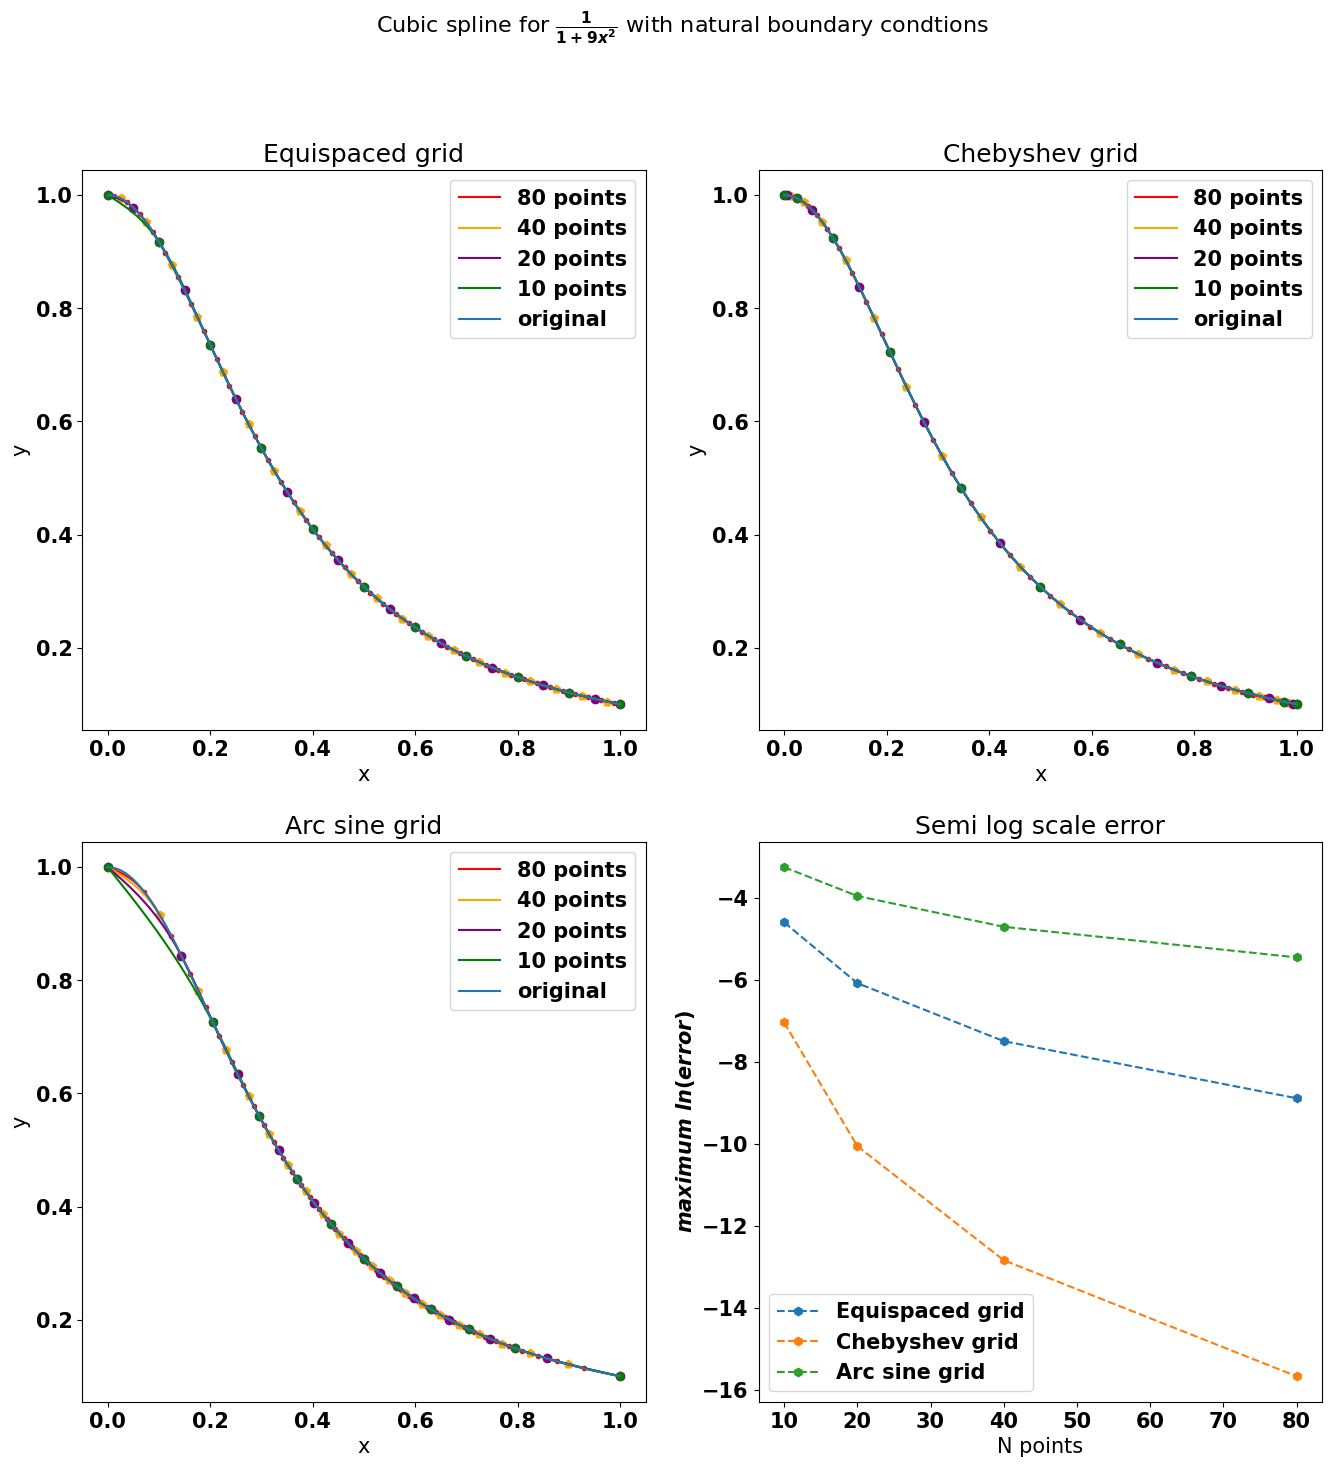

In [10]:
error1_nat = plot(first,'natural')

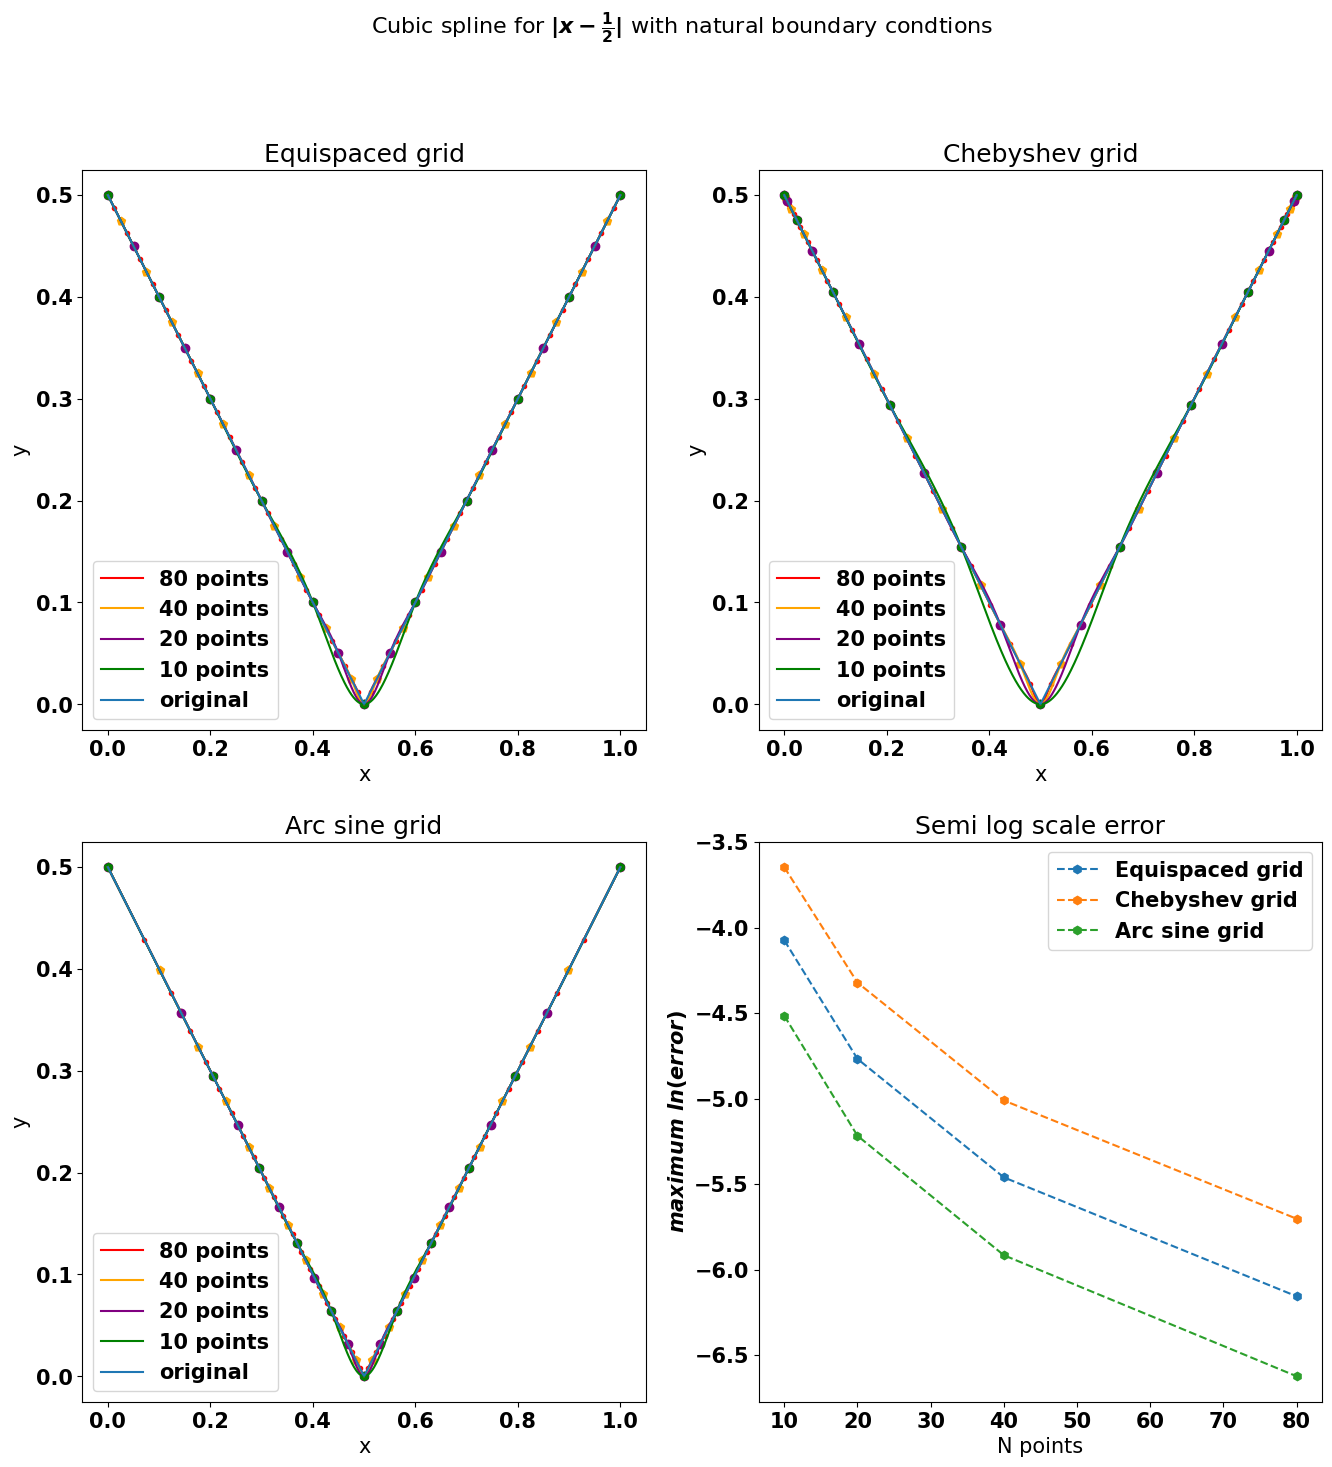

In [11]:
error2_nat = plot(second,'natural')

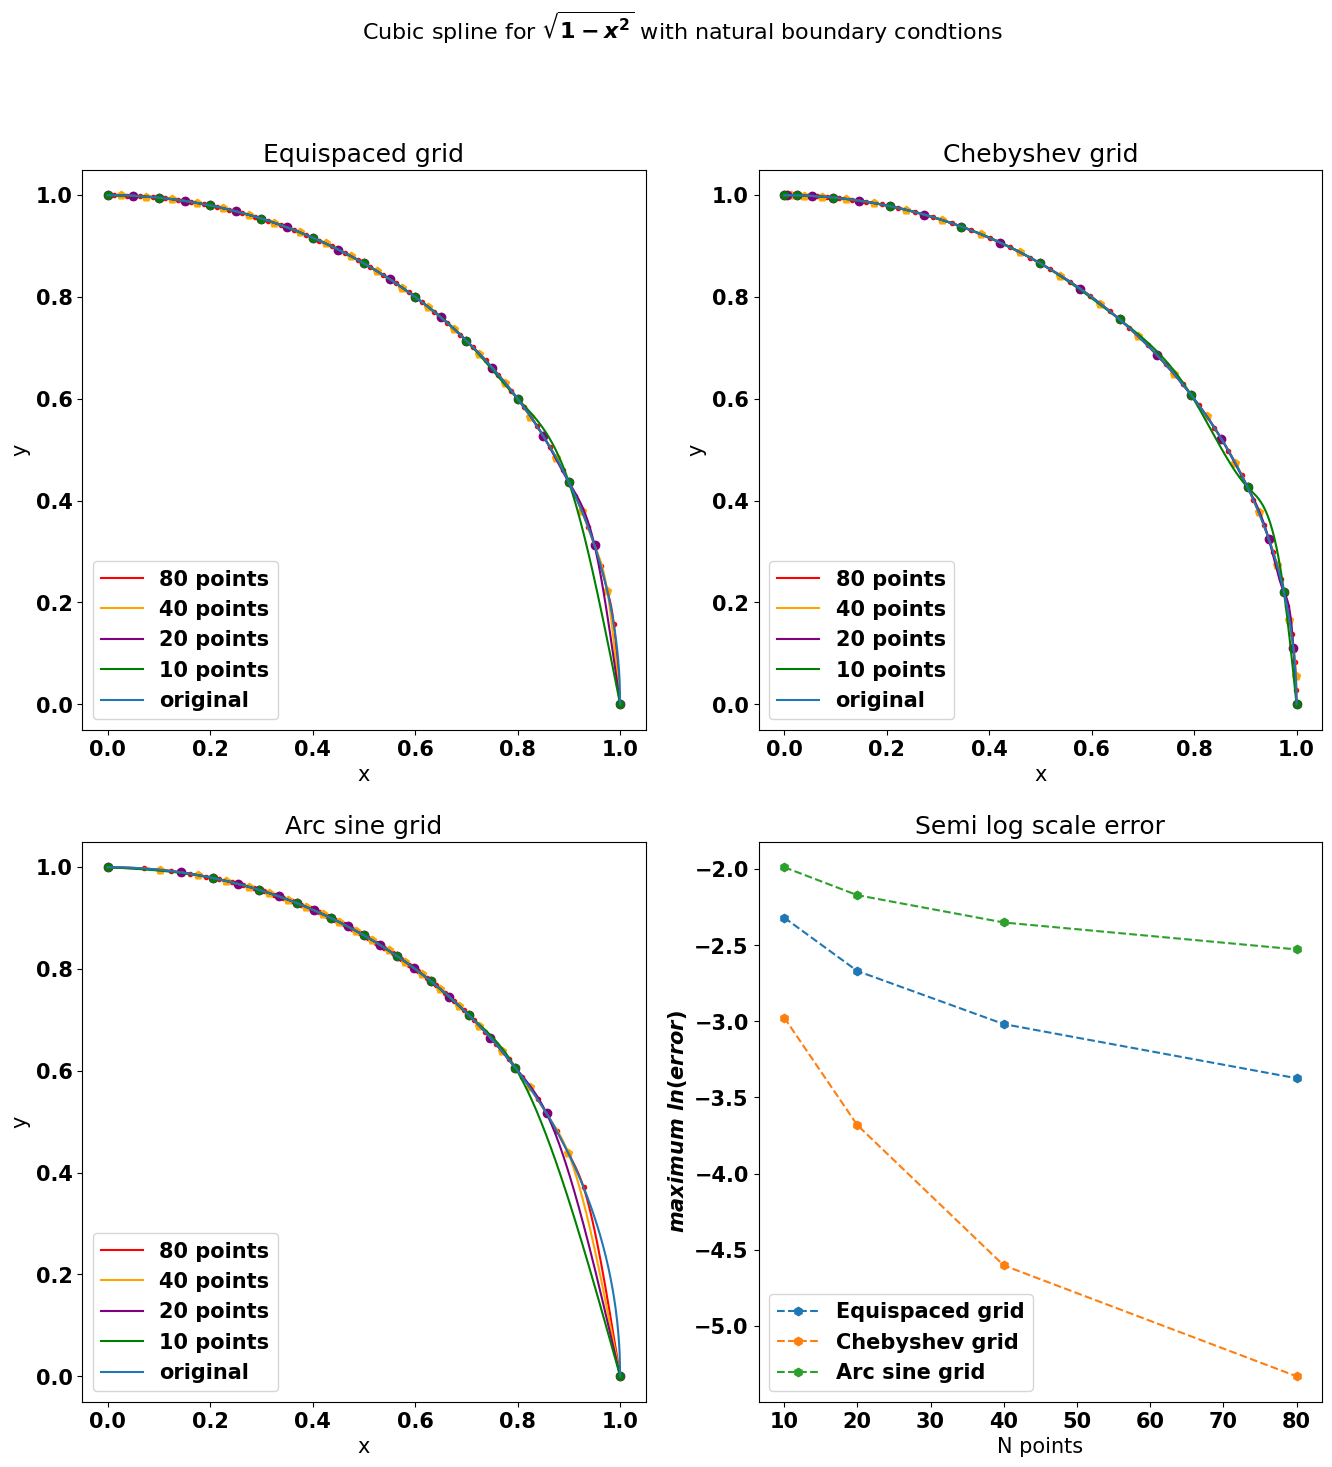

In [12]:
error3_nat = plot(third,'natural')

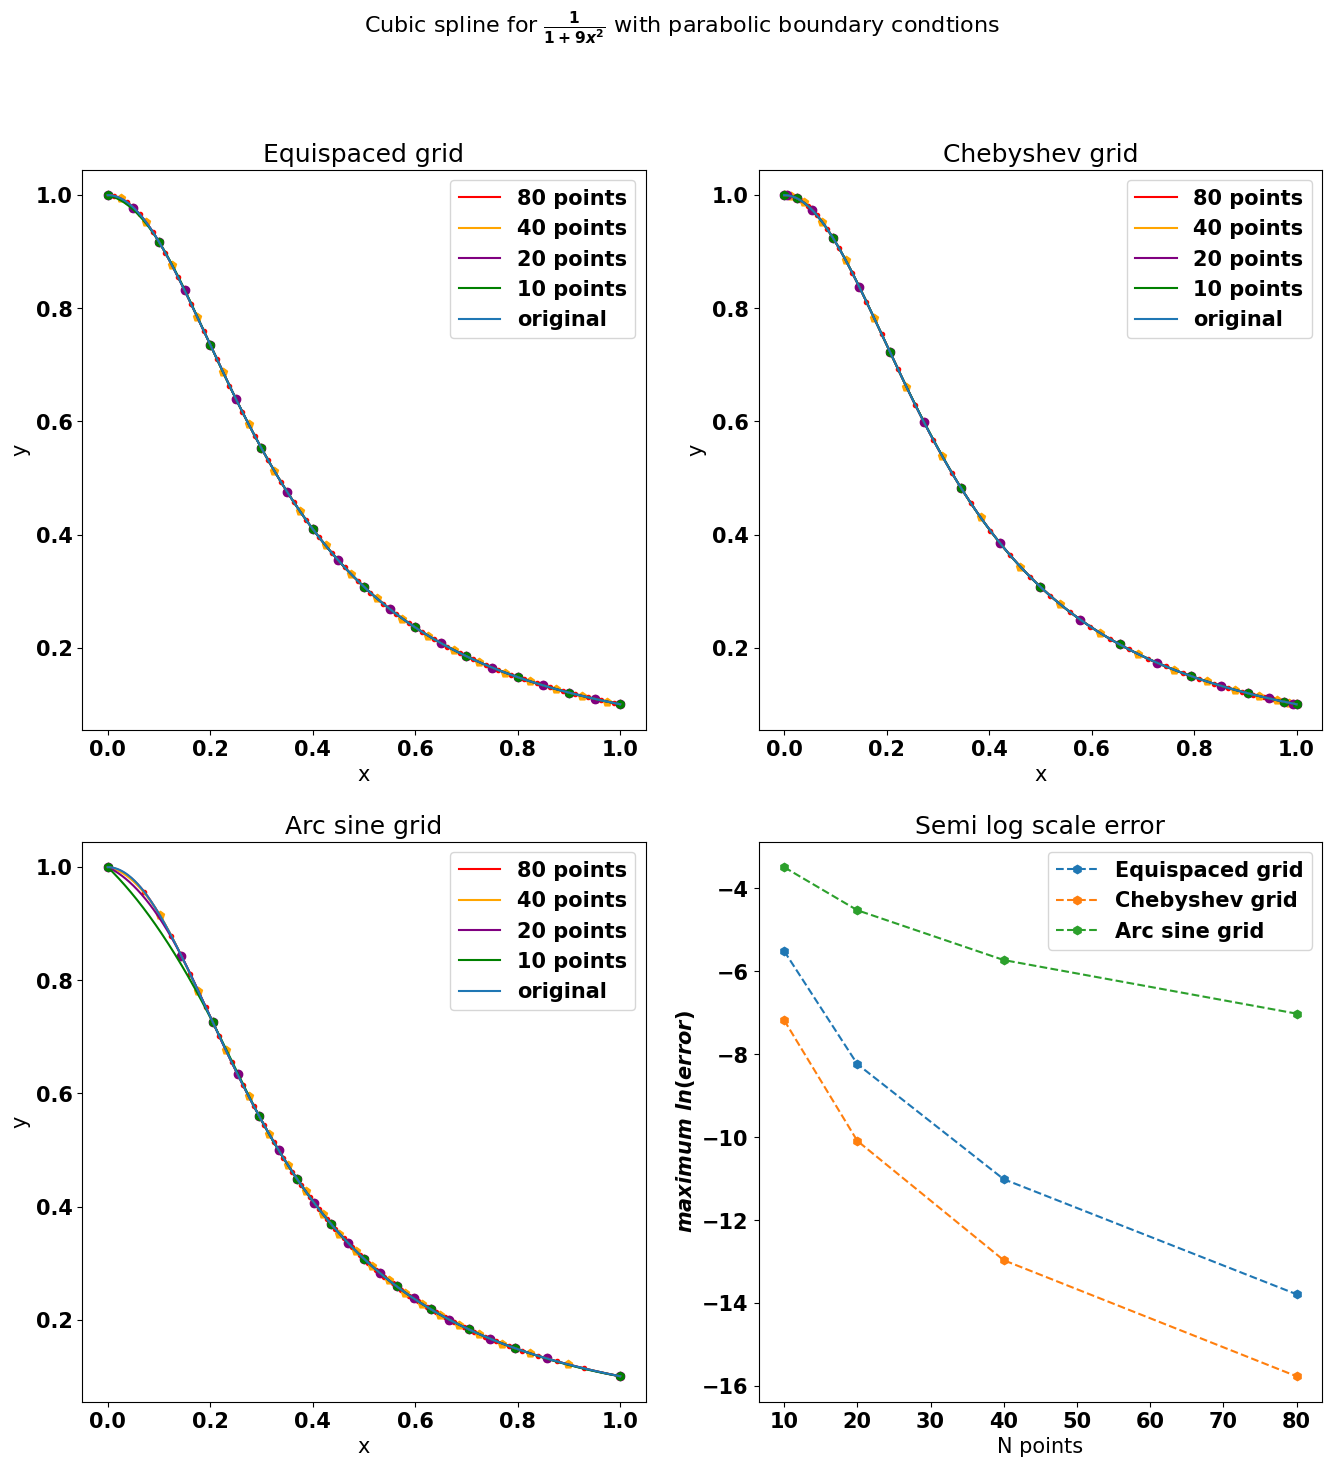

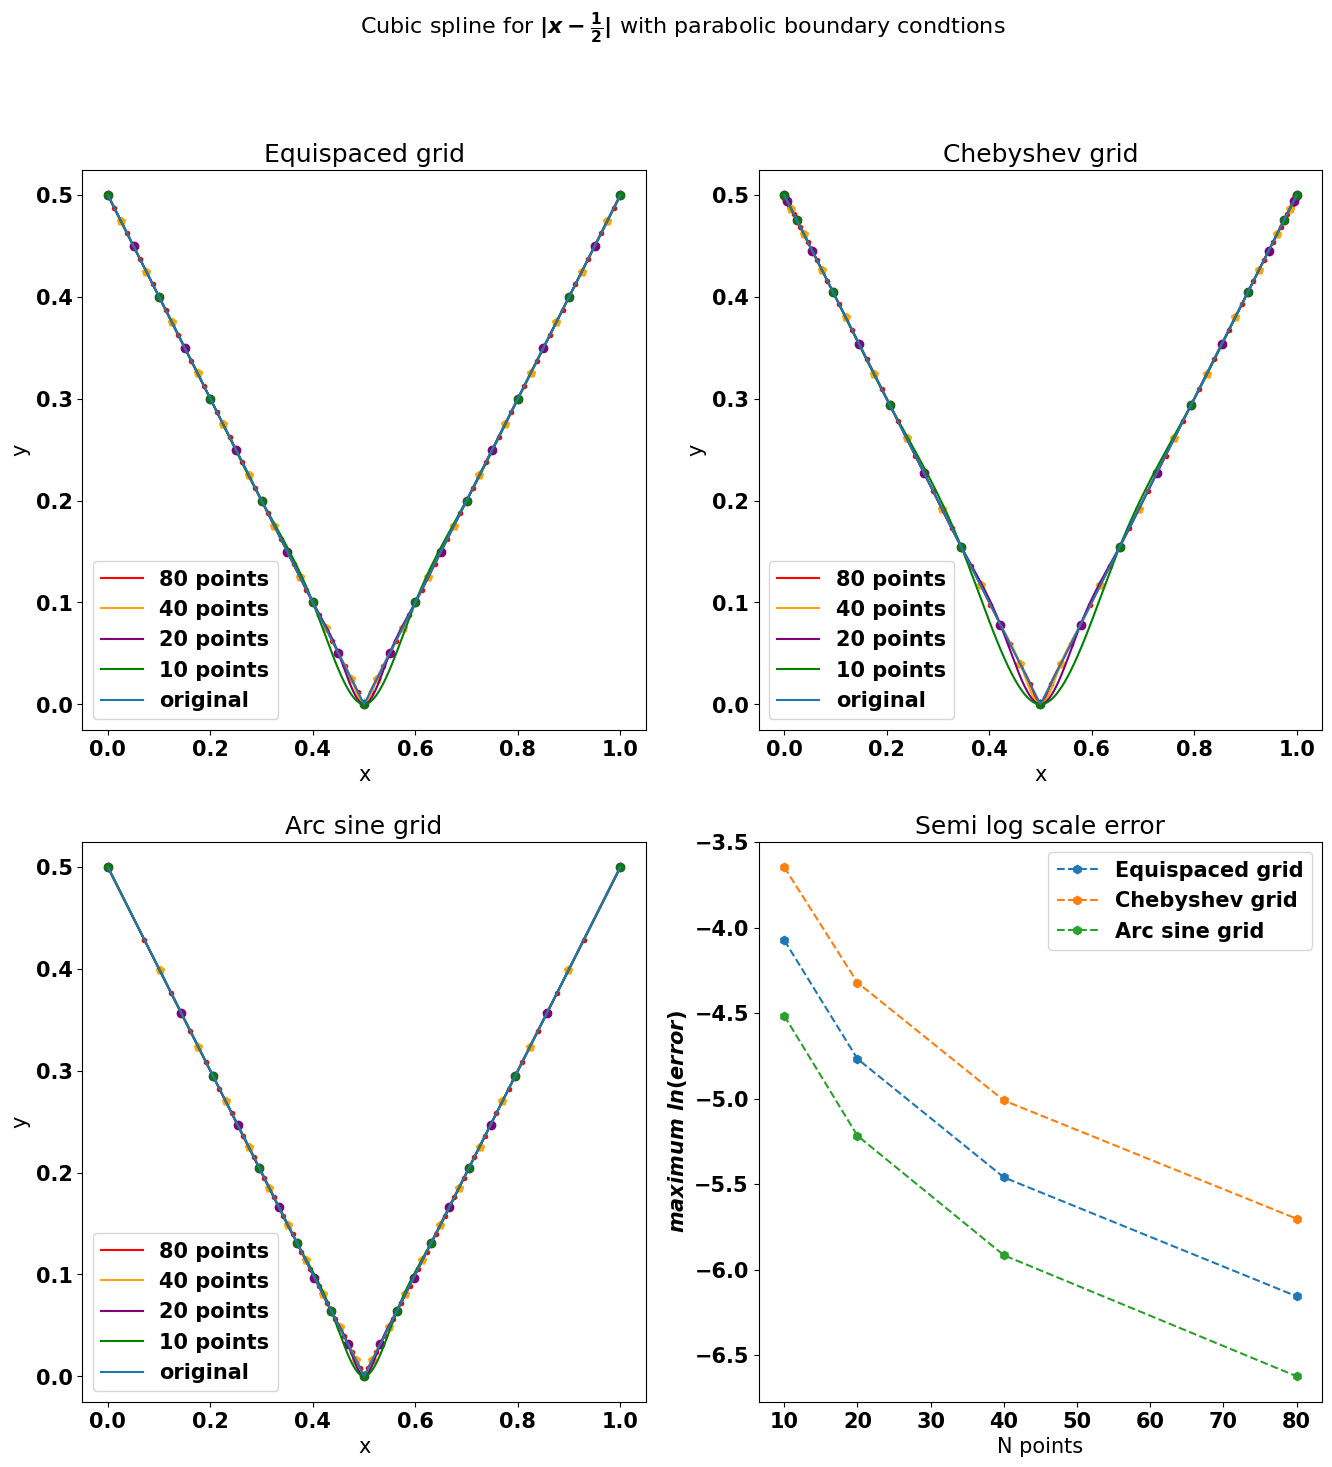

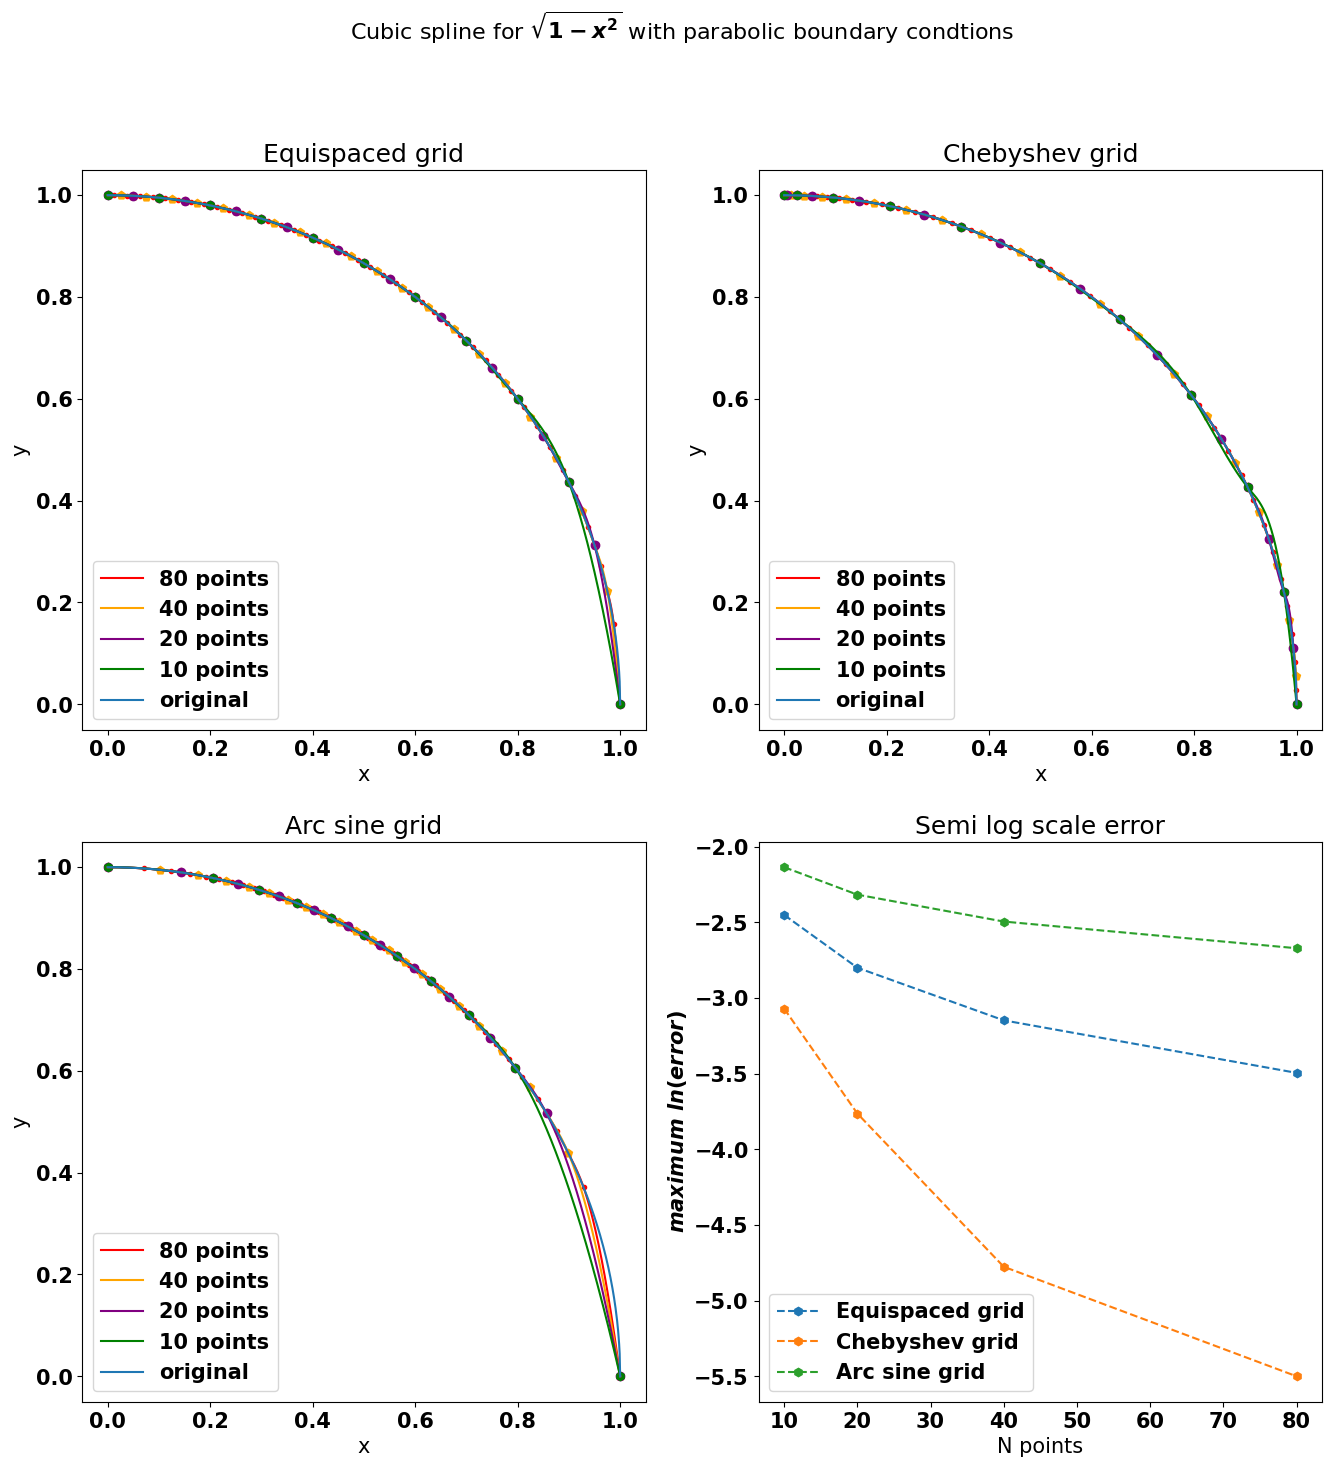

In [13]:
error1_parab = plot(first,'parabolic')
error2_parab = plot(second,'parabolic')
error3_parab = plot(third,'parabolic')

## Log Log scale

In [14]:
def plot_loglog(error1,error2,error3,boundary_conditions = 'natural'):
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    fig.suptitle(f'For {boundary_conditions} boundary conditions')
    axes[0].plot(np.log([10,20,40,80]),[error1['eq10'],error1['eq20'],error1['eq40'],error1['eq80']],marker='*', label ='Equispaced grid' )
    axes[0].plot(np.log([10,20,40,80]),[error1['ch10'],error1['ch20'],error1['ch40'],error1['ch80']],marker='*', label ='Chebyshev grid' )
    axes[0].plot(np.log([10,20,40,80]),[error1['ar10'],error1['ar20'],error1['ar40'],error1['ar80']],marker='*', label ='Arc sine grid' )
    axes[0].set_title(r'Errors in log-log scale for the function: $\frac{1}{1+9x^2}$')
    axes[0].legend()
    axes[0].set_xlabel(r'$ln(N)$')
    axes[0].set_ylabel(r'$ln(max error)$')

    axes[1].plot(np.log([10,20,40,80]),[error2['eq10'],error2['eq20'],error2['eq40'],error2['eq80']],marker='*', label ='Equispaced grid' )
    axes[1].plot(np.log([10,20,40,80]),[error2['ch10'],error2['ch20'],error2['ch40'],error2['ch80']],marker='*', label ='Chebyshev grid' )
    axes[1].plot(np.log([10,20,40,80]),[error2['ar10'],error2['ar20'],error2['ar40'],error2['ar80']],marker='*', label ='Arc sine grid' )
    axes[1].set_title(r'Errors in log-log scale for the function: $|x-\frac{1}{2}|$')
    axes[1].legend()
    axes[1].set_xlabel(r'$ln(N)$')
    axes[1].set_ylabel(r'$ln(max error)$')

    axes[2].plot(np.log([10,20,40,80]),[error3['eq10'],error3['eq20'],error3['eq40'],error3['eq80']],marker='*', label ='Equispaced grid' )
    axes[2].plot(np.log([10,20,40,80]),[error3['ch10'],error3['ch20'],error3['ch40'],error3['ch80']],marker='*', label ='Chebyshev grid' )
    axes[2].plot(np.log([10,20,40,80]),[error3['ar10'],error3['ar20'],error3['ar40'],error3['ar80']],marker='*', label ='Arc sine grid' )
    axes[2].set_title(r'Errors in log-log scale for the function: $\sqrt{1-x^2}$')
    axes[2].legend()
    axes[2].set_xlabel(r'$ln(N)$')
    axes[2].set_ylabel(r'$ln(max error)$')
    plt.savefig('loglog'+boundary_conditions)

    plt.show();

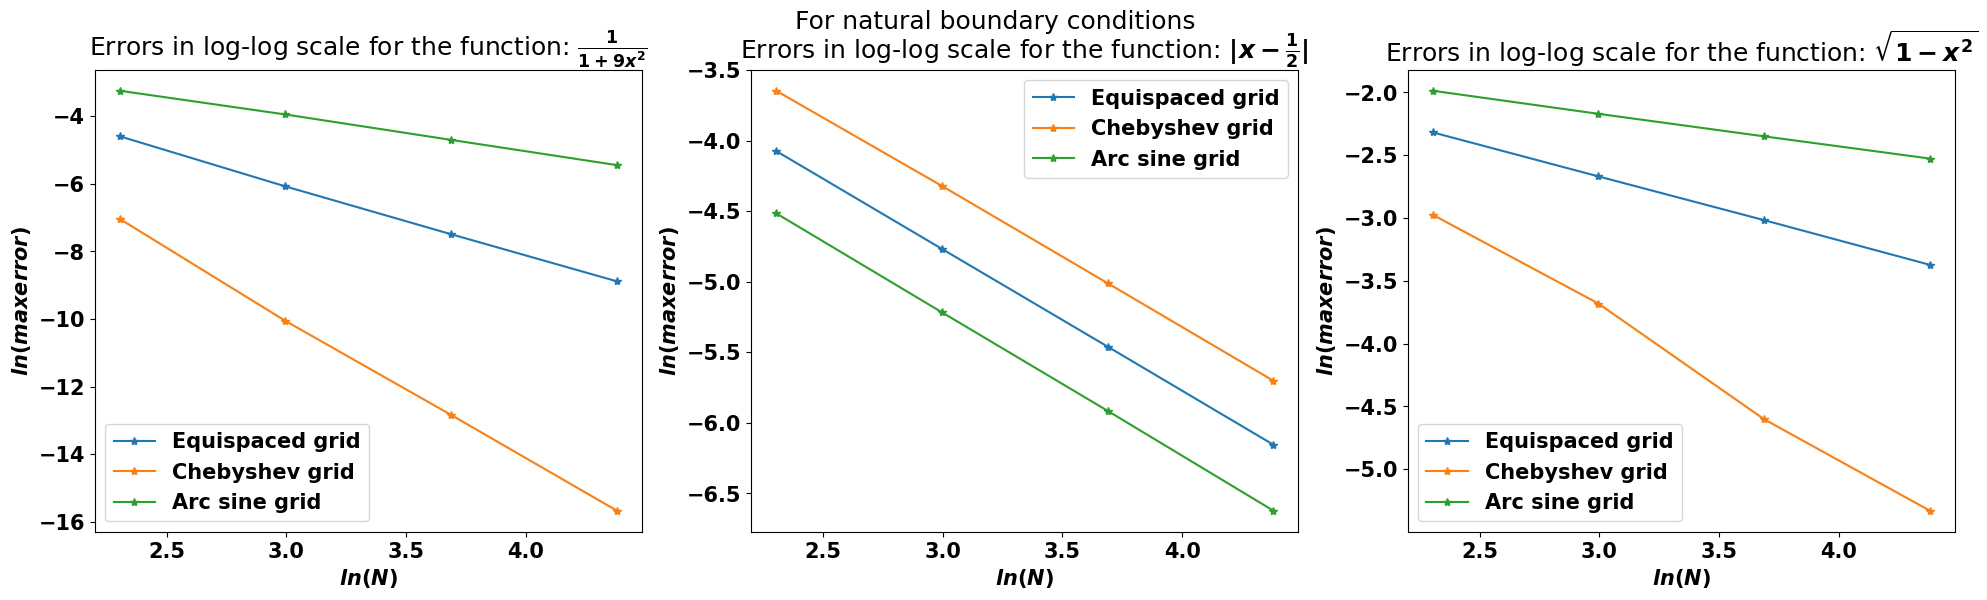

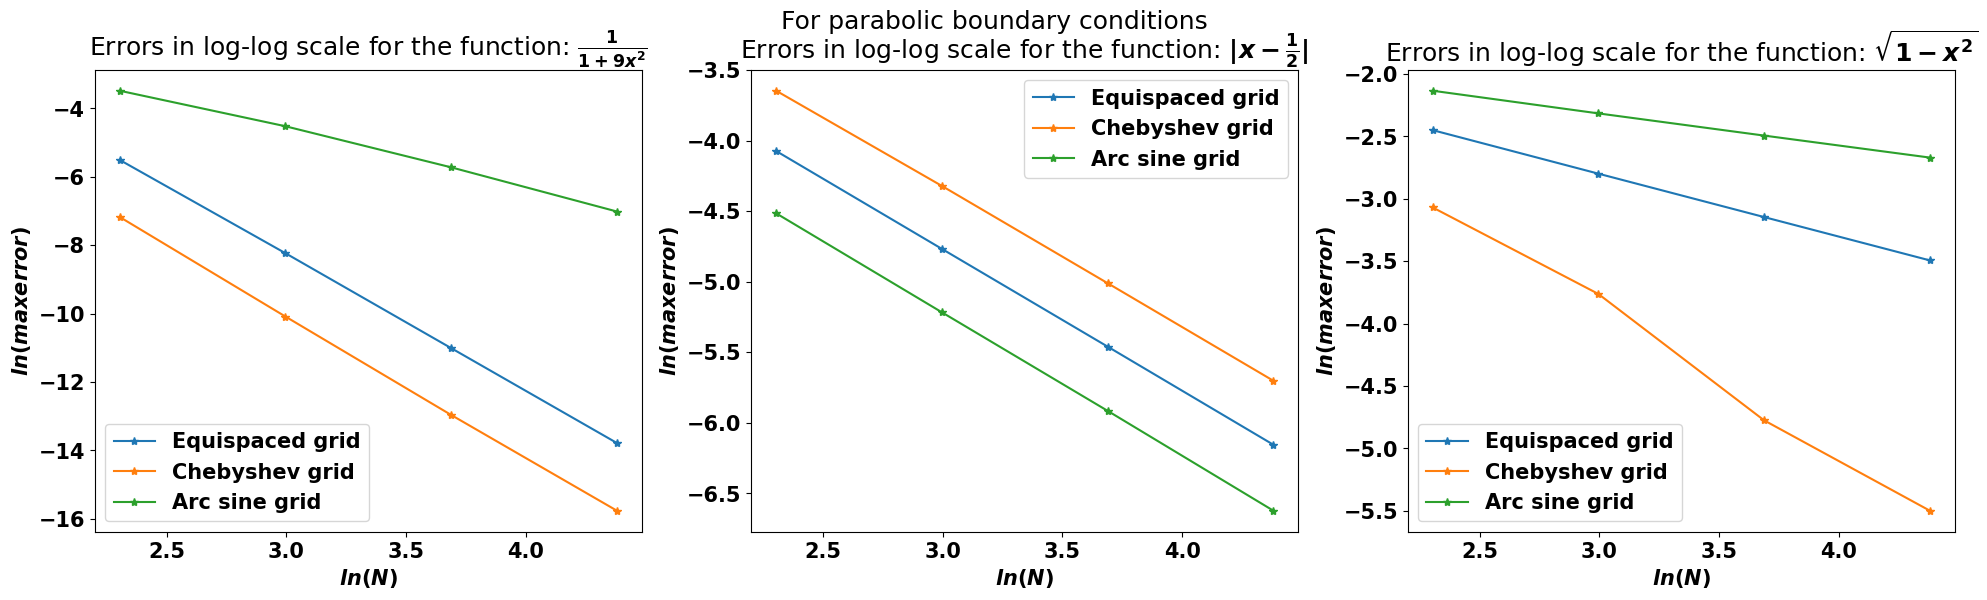

In [15]:
plot_loglog(error1_nat,error2_nat,error3_nat,'natural')
plot_loglog(error1_parab,error2_parab,error3_parab,'parabolic')

#### For natural boundary conditions

In [16]:
reseq1 = stats.linregress(np.log([10,20,40,80]),[error1_nat['eq10'],error1_nat['eq20'],error1_nat['eq40'],error1_nat['eq80']])
resch1 = stats.linregress(np.log([10,20,40,80]),[error1_nat['ch10'],error1_nat['ch20'],error1_nat['ch40'],error1_nat['ch80']])
resar1 = stats.linregress(np.log([10,20,40,80]),[error1_nat['ar10'],error1_nat['ar20'],error1_nat['ar40'],error1_nat['ar80']])
print(f'For first fucntion: Convergence order for equispaced {reseq1.slope}, for cheb {resch1.slope}, for arcsine {resar1.slope}')

For first fucntion: Convergence order for equispaced -2.0614568496215058, for cheb -4.137706844530758, for arcsine -1.0608805412224755


In [17]:
reseq2 = stats.linregress(np.log([10,20,40,80]),[error2_nat['eq10'],error2_nat['eq20'],error2_nat['eq40'],error2_nat['eq80']])
resch2 = stats.linregress(np.log([10,20,40,80]),[error2_nat['ch10'],error2_nat['ch20'],error2_nat['ch40'],error2_nat['ch80']])
resar2 = stats.linregress(np.log([10,20,40,80]),[error2_nat['ar10'],error2_nat['ar20'],error2_nat['ar40'],error2_nat['ar80']])
print(f'For second fucntion: Convergence order for equispaced {reseq2.slope}, for cheb {resch2.slope}, for arcsine {resar2.slope}')

For second fucntion: Convergence order for equispaced -1.0008056070830846, for cheb -0.9889784977252877, for arcsine -1.0128884366533208


In [18]:
reseq3 = stats.linregress(np.log([10,20,40,80]),[error3_nat['eq10'],error3_nat['eq20'],error3_nat['eq40'],error3_nat['eq80']])
resch3 = stats.linregress(np.log([10,20,40,80]),[error3_nat['ch10'],error3_nat['ch20'],error3_nat['ch40'],error3_nat['ch80']])
resar3 = stats.linregress(np.log([10,20,40,80]),[error3_nat['ar10'],error3_nat['ar20'],error3_nat['ar40'],error3_nat['ar80']])
print(f'For third fucntion: Convergence order for equispaced {reseq3.slope}, for cheb {resch3.slope}, for arcsine {resar3.slope}')

For third fucntion: Convergence order for equispaced -0.5070580011080531, for cheb -1.1529729218432057, for arcsine -0.2597037168070006


#### For parabolic natural conditions

In [19]:
reseq1 = stats.linregress(np.log([10,20,40,80]),[error1_parab['eq10'],error1_parab['eq20'],error1_parab['eq40'],error1_parab['eq80']])
resch1 = stats.linregress(np.log([10,20,40,80]),[error1_parab['ch10'],error1_parab['ch20'],error1_parab['ch40'],error1_parab['ch80']])
resar1 = stats.linregress(np.log([10,20,40,80]),[error1_parab['ar10'],error1_parab['ar20'],error1_parab['ar40'],error1_parab['ar80']])
print(f'For first fucntion: Convergence order for equispaced {reseq1.slope}, for cheb {resch1.slope}, for arcsine {resar1.slope}')

For first fucntion: Convergence order for equispaced -3.982198933124782, for cheb -4.131425822718693, for arcsine -1.7016505516350147


In [20]:
reseq2 = stats.linregress(np.log([10,20,40,80]),[error2_parab['eq10'],error2_parab['eq20'],error2_parab['eq40'],error2_parab['eq80']])
resch2 = stats.linregress(np.log([10,20,40,80]),[error2_parab['ch10'],error2_parab['ch20'],error2_parab['ch40'],error2_parab['ch80']])
resar2 = stats.linregress(np.log([10,20,40,80]),[error2_parab['ar10'],error2_parab['ar20'],error2_parab['ar40'],error2_parab['ar80']])
print(f'For second fucntion: Convergence order for equispaced {reseq2.slope}, for cheb {resch2.slope}, for arcsine {resar2.slope}')

For second fucntion: Convergence order for equispaced -1.000809802130106, for cheb -0.9889819933017411, for arcsine -1.0128914582139281


In [21]:
reseq3 = stats.linregress(np.log([10,20,40,80]),[error3_parab['eq10'],error3_parab['eq20'],error3_parab['eq40'],error3_parab['eq80']])
resch3 = stats.linregress(np.log([10,20,40,80]),[error3_parab['ch10'],error3_parab['ch20'],error3_parab['ch40'],error3_parab['ch80']])
resar3 = stats.linregress(np.log([10,20,40,80]),[error3_parab['ar10'],error3_parab['ar20'],error3_parab['ar40'],error3_parab['ar80']])
print(f'For third fucntion: Convergence order for equispaced {reseq3.slope}, for cheb {resch3.slope}, for arcsine {resar3.slope}')

For third fucntion: Convergence order for equispaced -0.5018584717274337, for cheb -1.1975376257974133, for arcsine -0.2574420566825335


## Zoomed plots

In [22]:
def plot_specific(funciton,boundary_condition='natural'):
    grid = {'eq10':equispaced(10),'eq20':equispaced(20),'eq40':equispaced(40),'eq80':equispaced(80),
       'ch10':chebyshev(10),'ch20':chebyshev(20),'ch40':chebyshev(40),'ch80':chebyshev(80),
       'ar10':arc_sine(10),'ar20':arc_sine(20),'ar40':arc_sine(40),'ar80':arc_sine(80)
        }
    
    fig, axes = plt.subplots(1, 3, figsize=(21, 7))
    inter = {}
    error = {}
    fin_grid = np.linspace(0,1,1000)
    original = funciton(fin_grid)
    for key, value in grid.items():
        qwer = []
        for i in fin_grid: 
            qwer.append(glueing(i,value,funciton(value),get_coeff(value,funciton(value))))

        inter[key] =qwer
        error[key] = maximum_error(original,qwer)


    #TODO: графики нужно сделать разными форматами: добавить метки разные + разные штриховки и прочее, чтобы было понятно
    if funciton==first: 
        title =  r'$\frac{1}{1+9x^2}$'
        name = 'first'
    elif funciton == second:
        title = r'$|x-\frac{1}{2}|$'
        name = 'second'
    else: 
        title = r'$\sqrt{1-x^2}$'
        name = 'third'

    fig.suptitle("Zoomed Cubic spline for "+title + ' with '+boundary_condition+' boundary condtions', fontsize=16)
   
    axes[0].plot(fin_grid, inter['eq80'],label = '80 points',color = 'red')
    axes[0].plot(fin_grid, inter['eq40'],label = '40 points',color="orange" )
    axes[0].plot(fin_grid, inter['eq20'],label = '20 points',color="purple"  )
    axes[0].plot(fin_grid, inter['eq10'],label = '10 points',color="green" )
    
    axes[0].scatter(grid['eq80'], funciton(grid['eq80']),color = 'red', marker = '.')
    axes[0].scatter(grid['eq40'], funciton(grid['eq40']),color = 'orange', marker = 'p')
    axes[0].scatter(grid['eq20'], funciton(grid['eq20']),color = 'purple', marker = 'o')
    axes[0].scatter(grid['eq10'], funciton(grid['eq10']),color = 'green', marker = 'h')
    axes[0].plot(fin_grid,original,label = 'original')


    axes[1].plot(fin_grid, inter['ch80'],label = '80 points',color = 'red')
    axes[1].plot(fin_grid, inter['ch40'],label = '40 points',color="orange" )
    axes[1].plot(fin_grid, inter['ch20'],label = '20 points',color="purple"  )
    axes[1].plot(fin_grid, inter['ch10'],label = '10 points',color="green" )
    
    axes[1].scatter(grid['ch80'], funciton(grid['ch80']),color = 'red', marker = '.')
    axes[1].scatter(grid['ch40'], funciton(grid['ch40']),color = 'orange', marker = 'p')
    axes[1].scatter(grid['ch20'], funciton(grid['ch20']),color = 'purple', marker = 'o')
    axes[1].scatter(grid['ch10'], funciton(grid['ch10']),color = 'green', marker = 'h')
    axes[1].plot(fin_grid,original,label = 'original')
    
    axes[2].plot(fin_grid, inter['ar80'],label = '80 points',color = 'red')
    axes[2].plot(fin_grid, inter['ar40'],label = '40 points',color="orange" )
    axes[2].plot(fin_grid, inter['ar20'],label = '20 points',color="purple"  )
    axes[2].plot(fin_grid, inter['ar10'],label = '10 points',color="green" )
    
    
    
    axes[2].scatter(grid['ar80'], funciton(grid['ar80']),color = 'red', marker = '.')
    axes[2].scatter(grid['ar40'], funciton(grid['ar40']),color = 'orange', marker = 'p')
    axes[2].scatter(grid['ar20'], funciton(grid['ar20']),color = 'purple', marker = 'o')
    axes[2].scatter(grid['ar10'], funciton(grid['ar10']),color = 'green', marker = 'h')
    axes[2].plot(fin_grid,original,label = 'original')

    if funciton == first: 
        x_min,x_max = 0,0.25
        y_min,y_max = 0.6,1.01
    elif funciton == second: 
        x_min,x_max = 0.3,0.7
        y_min,y_max = 0,0.3
    else: 
        x_min,x_max = 0.6,1
        y_min,y_max = 0,0.6
    axes[0].set_title('Equispaced grid')
    axes[1].set_title('Chebyshev grid')
    axes[2].set_title('Arc sine grid')
    axes[0].legend(loc='best')
    axes[1].legend(loc='best')
    axes[2].legend(loc='best')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[2].set_xlabel('x')
    axes[2].set_ylabel('y')
    axes[0].set_xlim(x_min,x_max)
    axes[1].set_xlim(x_min,x_max)
    axes[2].set_xlim(x_min,x_max)
    axes[0].set_ylim(y_min,y_max)
    axes[1].set_ylim(y_min,y_max)
    axes[2].set_ylim(y_min,y_max)
    fig.savefig('zoomed'+name+boundary_condition,bbox_inches='tight')
    plt.show();

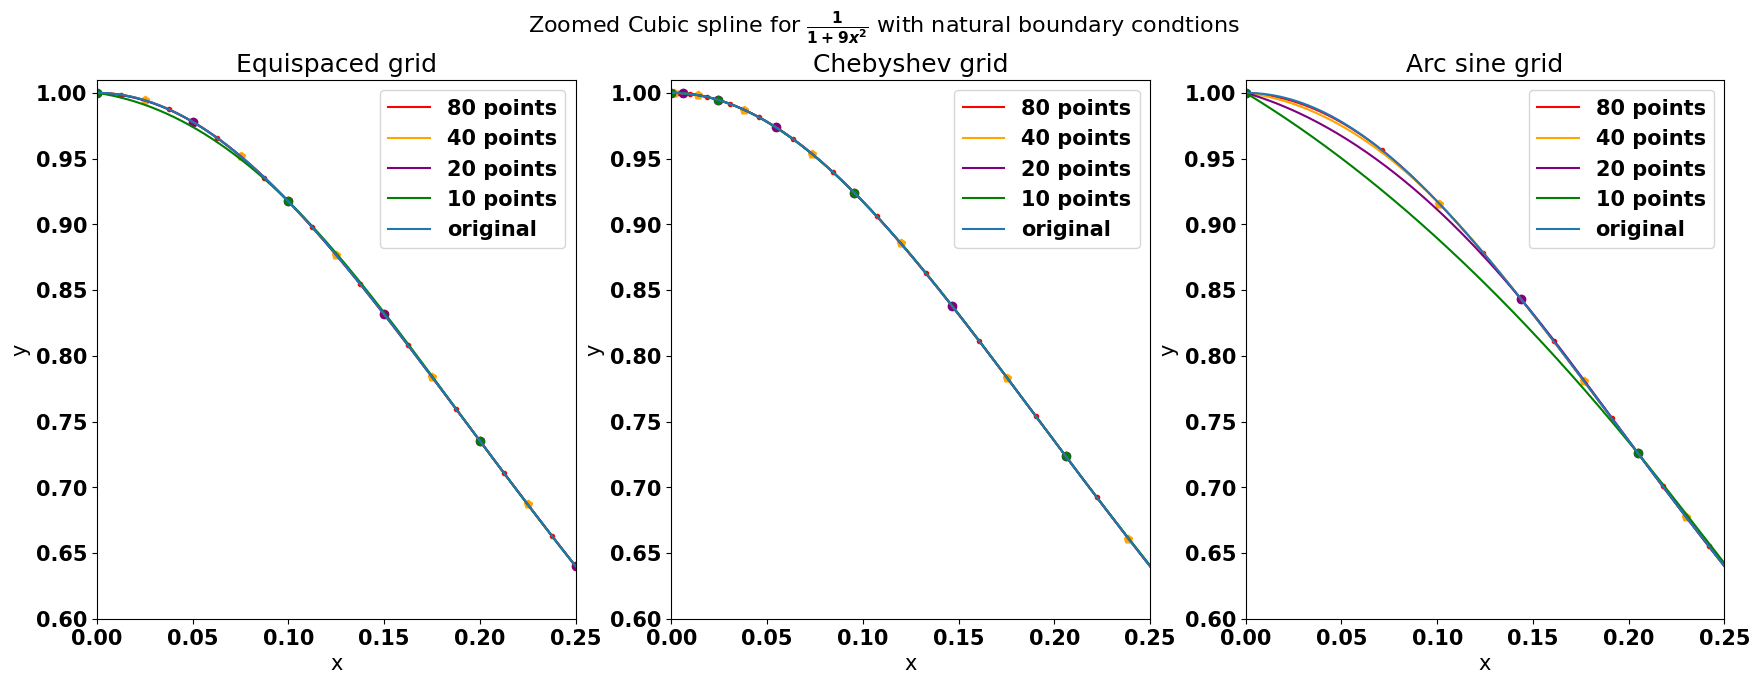

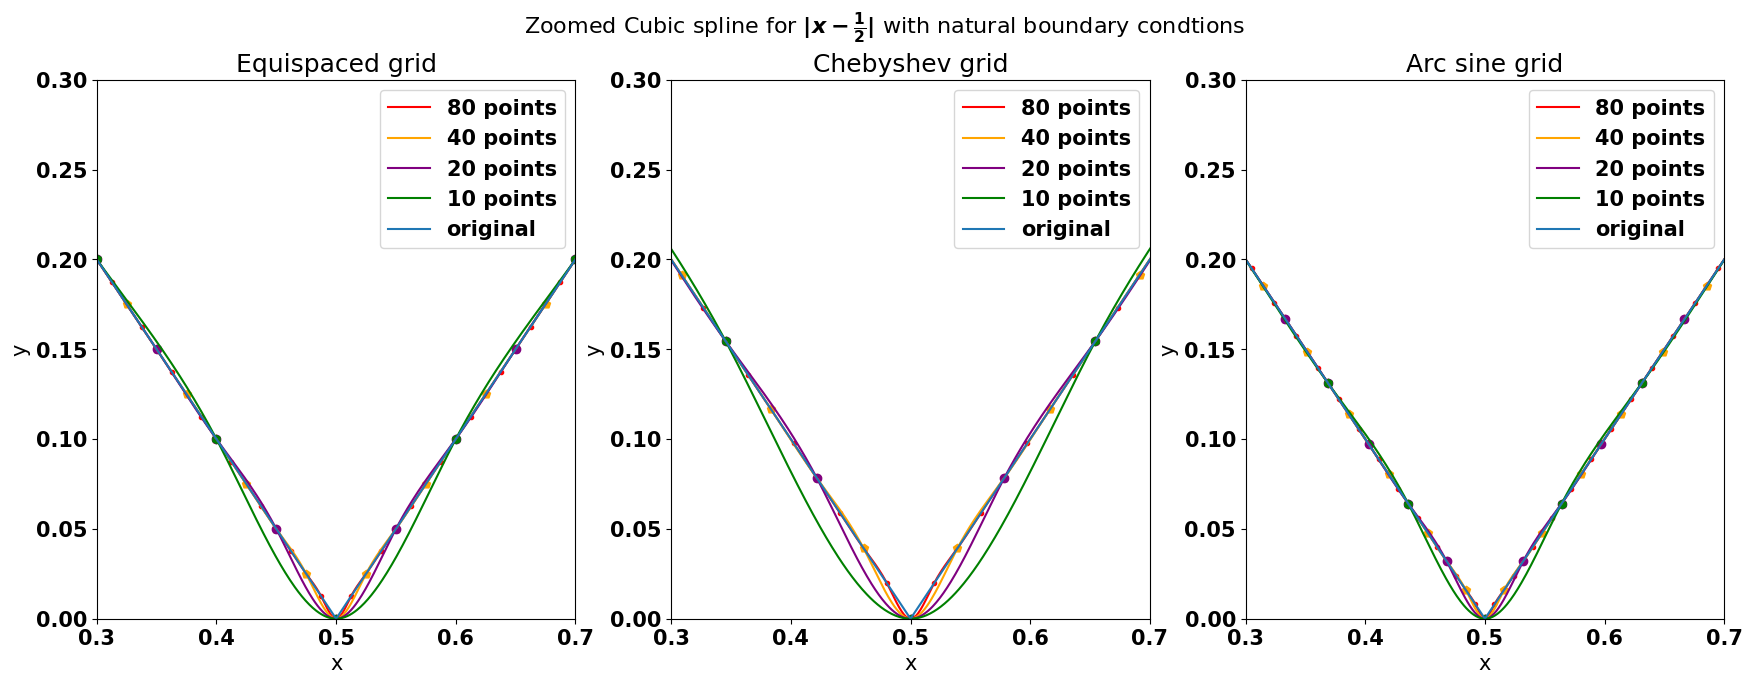

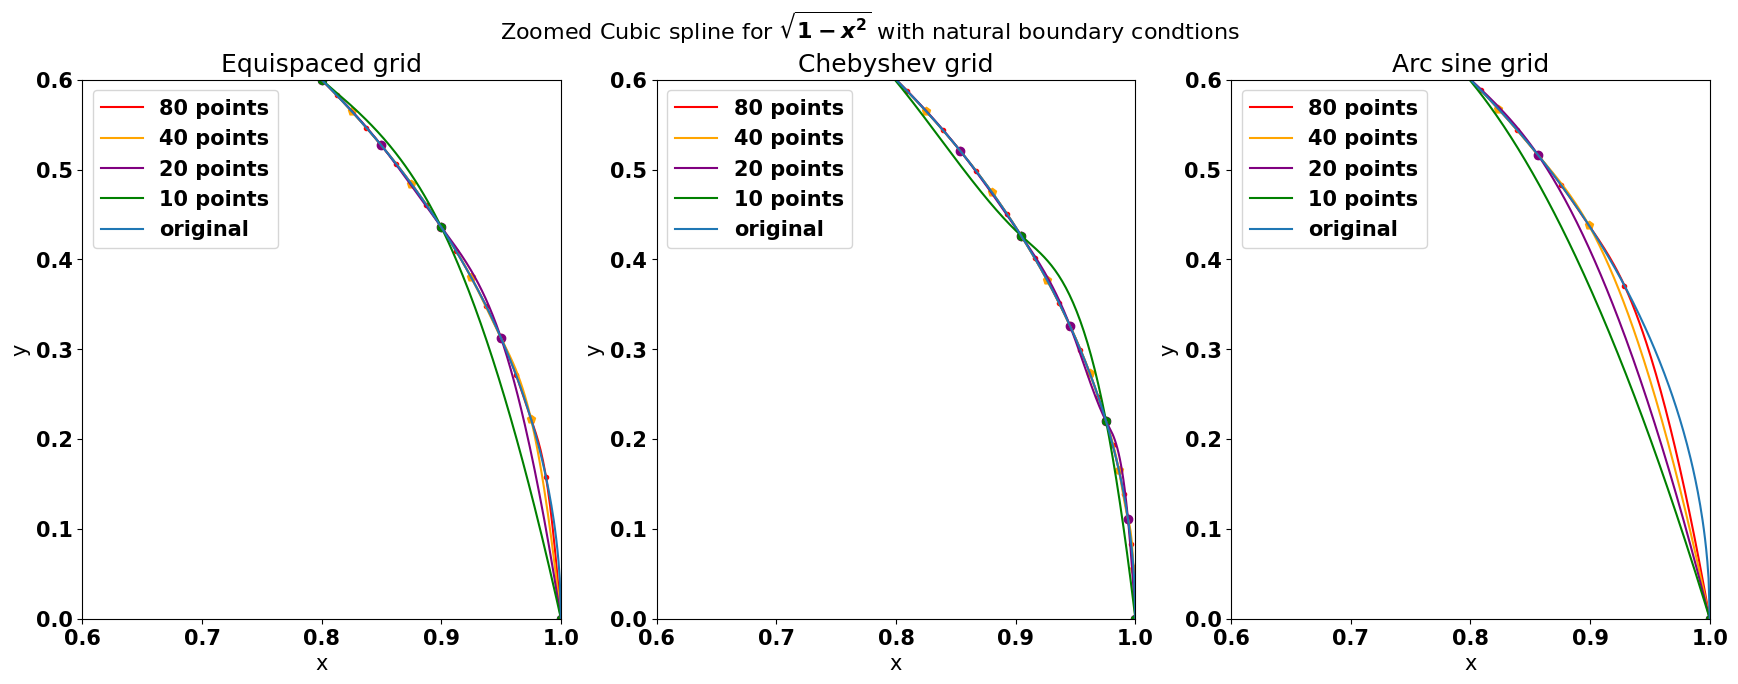

In [23]:
plot_specific(first,'natural')
plot_specific(second,'natural')
plot_specific(third,'natural')

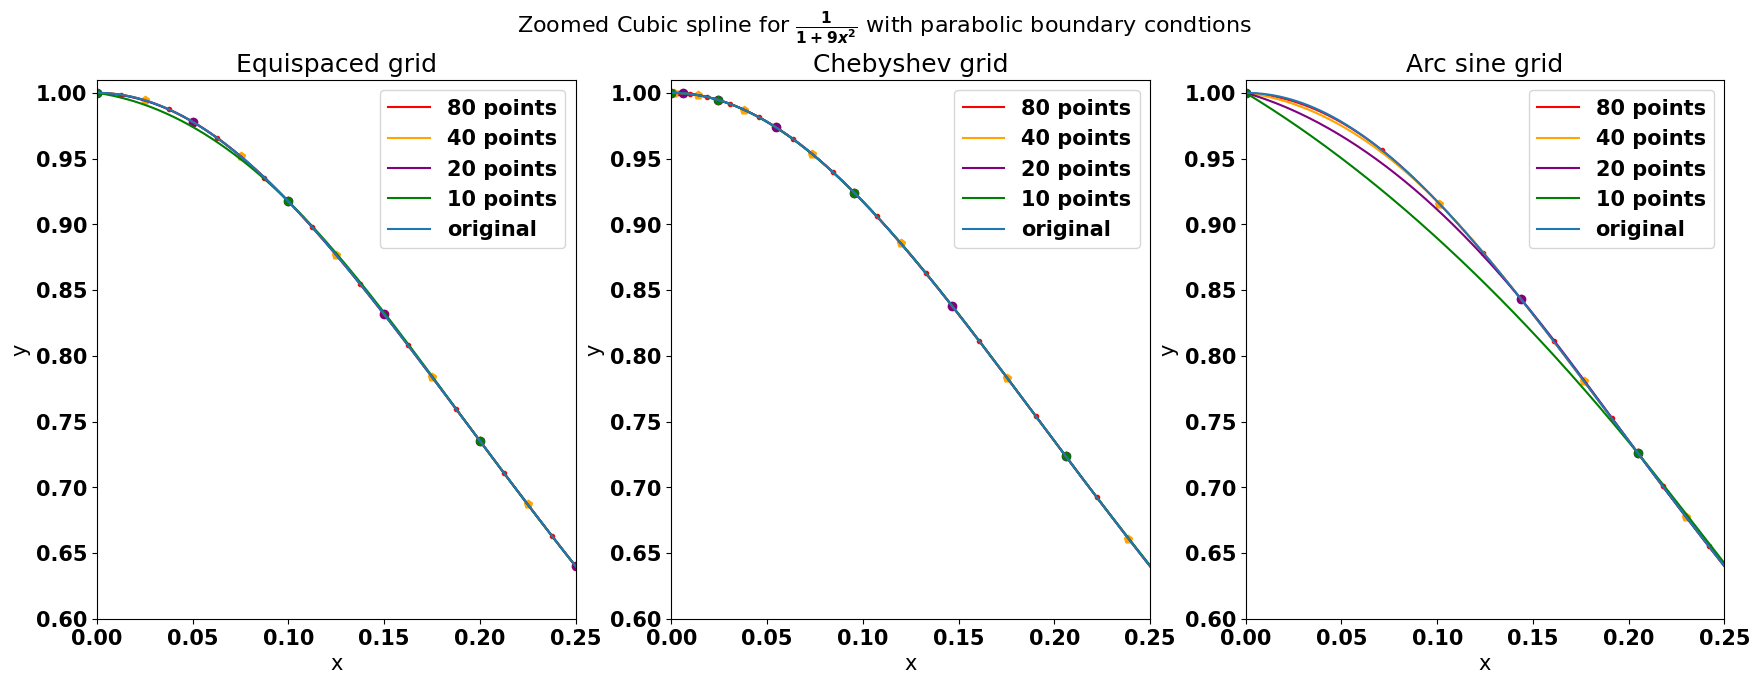

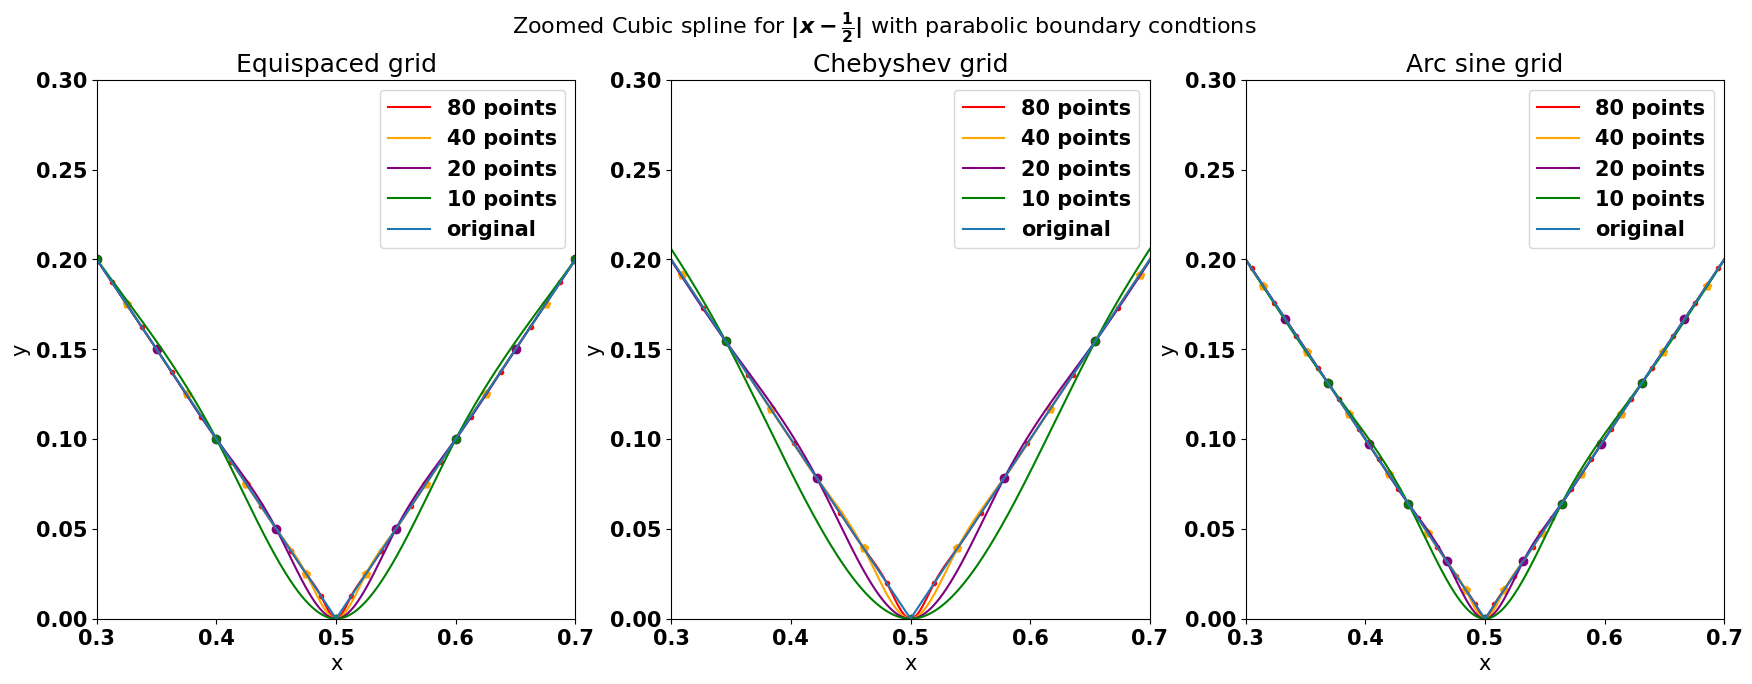

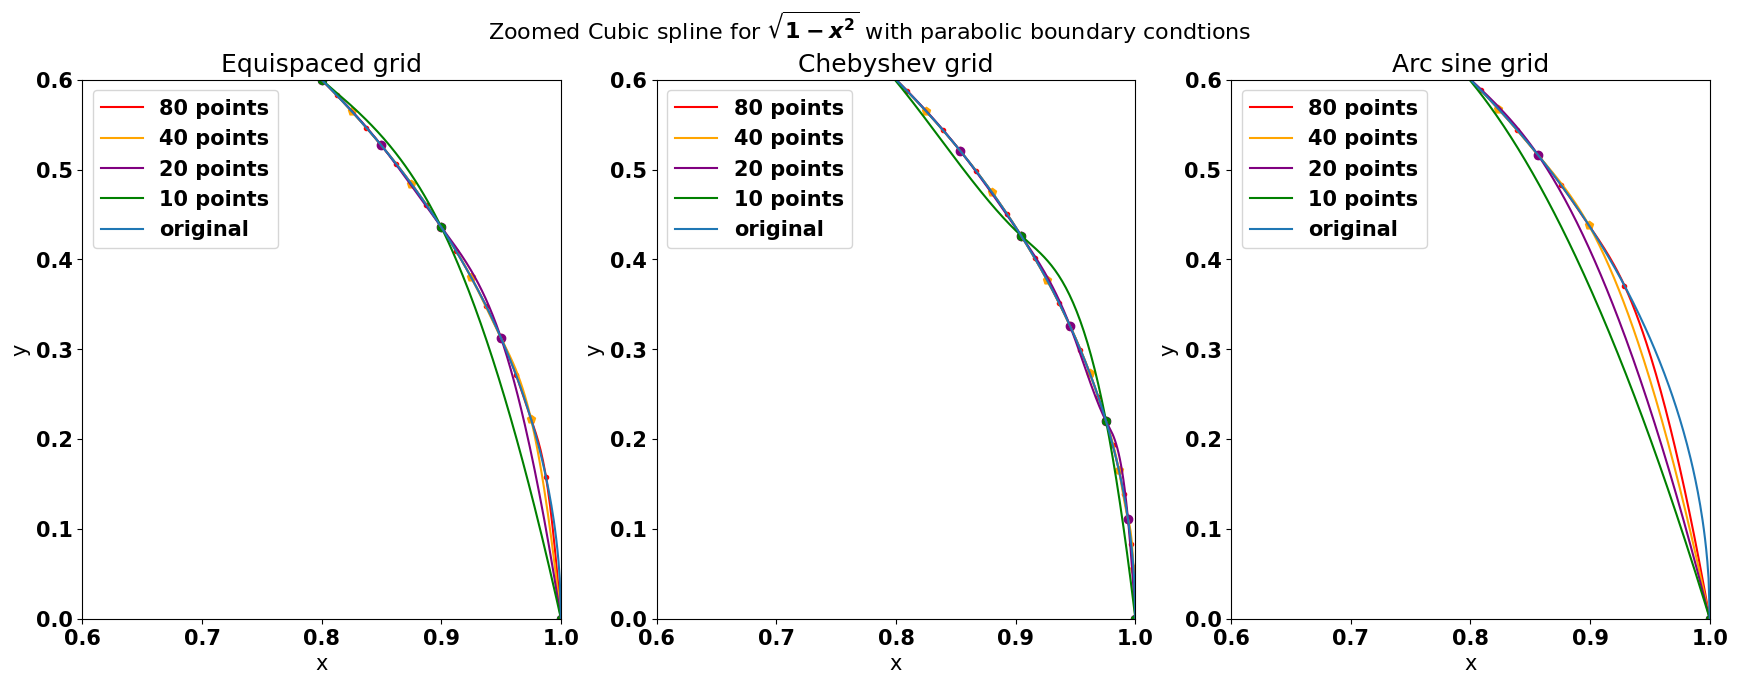

In [24]:
plot_specific(first,'parabolic')
plot_specific(second,'parabolic')
plot_specific(third,'parabolic')

# Problem 3

In [25]:
h = sym.Symbol('h')
D = sym.Symbol('D')

In [26]:
N = 8

## First derivative

In [28]:
exp_2 = sym.series(sym.exp(-2*h),h,n = N).removeO()
exp_1 = sym.series(sym.exp(-1*h),h,n = N).removeO()
exp0 = sym.series(sym.exp(0*h),h,n = N).removeO()
exp1 = sym.series(sym.exp(1*h),h,n = N).removeO()
exp2 = sym.series(sym.exp(2*h),h,n = N).removeO()
rexp_2 = sym.series(sym.exp(-2*h),h,n = N+1).removeO()
rexp_1 = sym.series(sym.exp(-1*h),h,n = N+1).removeO()
rexp0 = sym.series(sym.exp(0*h),h,n = N+1).removeO()
rexp1 = sym.series(sym.exp(1*h),h,n = N+1).removeO()
rexp2 = sym.series(sym.exp(2*h),h,n = N+1).removeO()
b_2 = sym.Symbol('b4')
b_1 = sym.Symbol('b3')
b0 = sym.Symbol('b0')
b1 = sym.Symbol('b1')
b2 = sym.Symbol('b2')
a_2 = sym.Symbol('a4')
a_1 = sym.Symbol('a3')
a0 = sym.Symbol('a0')
a1 = sym.Symbol('a1')
a2 = sym.Symbol('a2')
lhs = h*(b_2*exp_2 + b_1*exp_1 +b1*exp1+b2*exp2)
rhs = a_2*rexp_2 + a_1*rexp_1 + a0+a1*rexp1+a2*rexp2
poly = sym.Poly(lhs-rhs,h)
eqs = poly.all_coeffs()
poly = sym.Poly(lhs-rhs,h)
eqs = poly.all_coeffs()
eqs[-2] = eqs[-2]-1
coeffs = sym.solve(eqs,[b_2,b_1,b1,b2,a_2,a_1,a0,a1,a2],dict = True)
print(coeffs)
exp_2d = sym.series(sym.exp(-2*h*D),h,n = N+1)
exp_1d = sym.series(sym.exp(-1*h*D),h,n = N+1)
exp0d = sym.series(sym.exp(0*h*D),h,n = N+1)
exp1d = sym.series(sym.exp(1*h*D),h,n = N+1)
exp2d = sym.series(sym.exp(2*h*D),h,n = N+1)
rexp_2d = sym.series(sym.exp(-2*h*D),h,n = N+1+1)
rexp_1d = sym.series(sym.exp(-1*h*D),h,n = N+1+1)
rexp0d = sym.series(sym.exp(0*h*D),h,n = N+1+1)
rexp1d = sym.series(sym.exp(1*h*D),h,n = N+1+1)
rexp2d = sym.series(sym.exp(2*h*D),h,n = N+1+1)
lhs = h*(coeffs[0][b_2]*exp_2d*D + coeffs[0][b_1]*exp_1d*D +coeffs[0][b1]*exp1d*D+coeffs[0][b2]*exp2d*D)
rhs = coeffs[0][a_2]*rexp_2d + coeffs[0][a_1]*rexp_1d + coeffs[0][a0]+coeffs[0][a1]*rexp1d+coeffs[0][a2]*rexp2d
sym.simplify((lhs-rhs)/h)

In [30]:
# lhs = h*(b_1*exp_1)
# rhs = a_1*rexp_1 + a0
# poly = sym.Poly(lhs-rhs,h)
# eqs = poly.all_coeffs()

[{a0: 0,
  a1: -20/27,
  a2: -25/216,
  a3: 20/27,
  a4: 25/216,
  b1: -4/9,
  b2: -1/36,
  b3: -4/9,
  b4: -1/36}]

D - D**9*h**8/22680 + O(h**9)

## For second derivative

In [36]:
N = 8

In [37]:
exp_2 = sym.series(sym.exp(-2*h),h,n = N).removeO()
exp_1 = sym.series(sym.exp(-1*h),h,n = N).removeO()
exp0 = sym.series(sym.exp(0*h),h,n = N).removeO()
exp1 = sym.series(sym.exp(1*h),h,n = N).removeO()
exp2 = sym.series(sym.exp(2*h),h,n = N).removeO()
rexp_2 = sym.series(sym.exp(-2*h),h,n = N+1).removeO()
rexp_1 = sym.series(sym.exp(-1*h),h,n = N+1).removeO()
rexp0 = sym.series(sym.exp(0*h),h,n = N+1).removeO()
rexp1 = sym.series(sym.exp(1*h),h,n = N+1).removeO()
rexp2 = sym.series(sym.exp(2*h),h,n = N+1).removeO()

In [39]:
b_2 = sym.Symbol('b_{-2}')
b_1 = sym.Symbol('b_{-1}')
b0 = sym.Symbol('b0')
b1 = sym.Symbol('b1')
b2 = sym.Symbol('b2')
a_2 = sym.Symbol('a_{-2}')
a_1 = sym.Symbol('a_{-1}')
a0 = sym.Symbol('a0')
a1 = sym.Symbol('a1')
a2 = sym.Symbol('a2')

In [40]:
lhs = h*h*(b_2*exp_2 + b_1*exp_1 +b1*exp1+b2*exp2)
rhs = a_2*rexp_2 + a_1*rexp_1 + a0+a1*rexp1+a2*rexp2
poly = sym.Poly(lhs-rhs,h)
eqs = poly.all_coeffs()

In [41]:
eqs

[b1/5040 + 8*b2/315 - b_{-1}/5040 - 8*b_{-2}/315,
 -a1/40320 - 2*a2/315 - a_{-1}/40320 - 2*a_{-2}/315 + b1/720 + 4*b2/45 + b_{-1}/720 + 4*b_{-2}/45,
 -a1/5040 - 8*a2/315 + a_{-1}/5040 + 8*a_{-2}/315 + b1/120 + 4*b2/15 - b_{-1}/120 - 4*b_{-2}/15,
 -a1/720 - 4*a2/45 - a_{-1}/720 - 4*a_{-2}/45 + b1/24 + 2*b2/3 + b_{-1}/24 + 2*b_{-2}/3,
 -a1/120 - 4*a2/15 + a_{-1}/120 + 4*a_{-2}/15 + b1/6 + 4*b2/3 - b_{-1}/6 - 4*b_{-2}/3,
 -a1/24 - 2*a2/3 - a_{-1}/24 - 2*a_{-2}/3 + b1/2 + 2*b2 + b_{-1}/2 + 2*b_{-2},
 -a1/6 - 4*a2/3 + a_{-1}/6 + 4*a_{-2}/3 + b1 + 2*b2 - b_{-1} - 2*b_{-2},
 -a1/2 - 2*a2 - a_{-1}/2 - 2*a_{-2} + b1 + b2 + b_{-1} + b_{-2},
 -a1 - 2*a2 + a_{-1} + 2*a_{-2},
 -a0 - a1 - a2 - a_{-1} - a_{-2}]

In [42]:
poly = sym.Poly(lhs-rhs,h)
eqs = poly.all_coeffs()
eqs[-3] = eqs[-3]-1

In [43]:
eqs

[b1/5040 + 8*b2/315 - b_{-1}/5040 - 8*b_{-2}/315,
 -a1/40320 - 2*a2/315 - a_{-1}/40320 - 2*a_{-2}/315 + b1/720 + 4*b2/45 + b_{-1}/720 + 4*b_{-2}/45,
 -a1/5040 - 8*a2/315 + a_{-1}/5040 + 8*a_{-2}/315 + b1/120 + 4*b2/15 - b_{-1}/120 - 4*b_{-2}/15,
 -a1/720 - 4*a2/45 - a_{-1}/720 - 4*a_{-2}/45 + b1/24 + 2*b2/3 + b_{-1}/24 + 2*b_{-2}/3,
 -a1/120 - 4*a2/15 + a_{-1}/120 + 4*a_{-2}/15 + b1/6 + 4*b2/3 - b_{-1}/6 - 4*b_{-2}/3,
 -a1/24 - 2*a2/3 - a_{-1}/24 - 2*a_{-2}/3 + b1/2 + 2*b2 + b_{-1}/2 + 2*b_{-2},
 -a1/6 - 4*a2/3 + a_{-1}/6 + 4*a_{-2}/3 + b1 + 2*b2 - b_{-1} - 2*b_{-2},
 -a1/2 - 2*a2 - a_{-1}/2 - 2*a_{-2} + b1 + b2 + b_{-1} + b_{-2} - 1,
 -a1 - 2*a2 + a_{-1} + 2*a_{-2},
 -a0 - a1 - a2 - a_{-1} - a_{-2}]

In [44]:
coeffs = sym.solve(eqs,[b_2,b_1,b1,b2,a_2,a_1,a0,a1,a2],dict = True)
coeffs

[{a0: 265/131,
  a1: -320/393,
  a2: -155/786,
  a_{-1}: -320/393,
  a_{-2}: -155/786,
  b1: -344/1179,
  b2: -23/2358,
  b_{-1}: -344/1179,
  b_{-2}: -23/2358}]

In [45]:
exp_2d = sym.series(sym.exp(-2*h*D),h,n = N+1+1)
exp_1d = sym.series(sym.exp(-1*h*D),h,n = N+1+1)
exp0d = sym.series(sym.exp(0*h*D),h,n = N+1+1)
exp1d = sym.series(sym.exp(1*h*D),h,n = N+1+1)
exp2d = sym.series(sym.exp(2*h*D),h,n = N+1+1)
rexp_2d = sym.series(sym.exp(-2*h*D),h,n = N+1+1+1)
rexp_1d = sym.series(sym.exp(-1*h*D),h,n = N+1+1+1)
rexp0d = sym.series(sym.exp(0*h*D),h,n = N+1+1+1)
rexp1d = sym.series(sym.exp(1*h*D),h,n = N+1+1+1)
rexp2d = sym.series(sym.exp(2*h*D),h,n = N+1+1+1)

In [46]:
lhs = h*h*D*D*(coeffs[0][b_2]*exp_2d + coeffs[0][b_1]*exp_1d +coeffs[0][b1]*exp1d+coeffs[0][b2]*exp2d)
rhs = coeffs[0][a_2]*rexp_2d + coeffs[0][a_1]*rexp_1d + coeffs[0][a0]+coeffs[0][a1]*rexp1d+coeffs[0][a2]*rexp2d

In [47]:
sym.simplify((lhs-rhs)/(h*h))

D**2 - 79*D**10*h**8/2971080 + O(h**9)

# Problem 4

In [2]:
def function(x,alpha,beta):
    function.counter += 1
    return np.power(x,alpha)*(1.2-x)*(1-np.exp(beta*(x-1)))

In [3]:
def trapezoidal(N,alpha,beta):
    x = np.linspace(0,1,N)
    h = abs(x[1]-x[0])
    integral = 0.5*(function(x[0],alpha,beta)+function(x[-1],alpha,beta))
    for i in range(1,N-1):
        integral += function(x[i],alpha,beta)
    return integral*h

In [4]:
def simpson(N, alpha,beta):
    x = np.linspace(0,1,N)
    h = abs(x[1]-x[0])
    integral = (function(x[0],alpha,beta)+function(x[-1],alpha,beta))
    steps = 2
    for i in range(1,N,2):
        integral += 4*function(x[i],alpha,beta)
        steps +=1
    for j in range(2,N-1,2):
        integral += 2*function(x[j],alpha,beta)
        steps +=1
    return integral*h/3

In [5]:
def trap(alpha,beta,a,b):
    return (function(a,alpha,beta)+function(b,alpha,beta))/2 * abs(b-a)

In [6]:
def trap_quad(alpha,beta,a,b,eps):
    p=2
    s0 = trap(alpha,beta,a,b)
    s1 = trap(alpha,beta,a,(a+b)/2)+trap(alpha,beta,(a+b)/2,b)
    if abs(s1-s0)<=eps*(1-1/2**p): 
        return s1
    else: 
        return trap_quad(alpha,beta,a,(a+b)/2,eps/2)+trap_quad(alpha,beta,(a+b)/2,b,eps/2)

In [7]:
def trapezoidal_quad(alpha,beta,a,b,eps=1e-03,k=10):
    steps = 0
    x = np.linspace(a,b,k)
    s = 0
    for i in range(k-1):
        s += trap_quad(alpha,beta,x[i],x[i+1],eps*abs(x[i]-x[i+1])/abs(b-a))
    return s

In [8]:
def simp(alpha,beta,a,b):
    return (function(a,alpha,beta) + 4*function((a+b)/2,alpha,beta)+function(b,alpha,beta))/6*abs(b-a)

In [9]:
def simp_quad(alpha,beta,a,b,eps):
    p = 4
    s0 = simp(alpha,beta,a,b)
    s1 = simp(alpha,beta,a,(a+b)/2)+trap(alpha,beta,(a+b)/2,b)
    if abs(s1-s0)<=eps*(1-1/2**p): 
        return s1
    else: 
        return simp_quad(alpha,beta,a,(a+b)/2,eps/2)+simp_quad(alpha,beta,(a+b)/2,b,eps/2)

In [10]:
def simpson_quad(alpha,beta,a,b,eps=1e-03,k = 10):
    x = np.linspace(a,b,k)
    s = 0
    for i in range(k-1):
        s += simp_quad(alpha,beta,x[i],x[i+1],eps*abs(x[i]-x[i+1])/abs(b-a))
    return s

In [11]:
tolerances = [1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10]

In [12]:
def evaluation_convergence(alpha,beta):
    steps_trap = []
    steps_simp = []
    for i in tolerances: 
        function.counter = 0
        trapezoidal_quad(alpha,beta,0,1,i)
        steps_trap.append(function.counter)
        function.counter = 0
        simpson_quad(alpha,beta,0,1,i)
        steps_simp.append(function.counter)

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle(rf'Convergence in log log scale for $\alpha = {alpha},\beta = {beta}$')
    # axes[0].plot(np.log10(steps_trap),np.log10(tolerances),marker = '*',label='trapezoidal quadrature')
    # axes[1].plot(np.log10(steps_simp),np.log10(tolerances),marker = 'h',label='simpson quadrature')
    axes[0].loglog(steps_trap,tolerances,marker = '*',label='trapezoidal quadrature')
    axes[1].loglog(steps_simp,tolerances,marker = 'h',label='simpson quadrature')


    axes[0].set_xticks(steps_trap)
    axes[0].xaxis.set_major_formatter(ScalarFormatter())
    axes[0].set_yticks(tolerances)
    axes[0].legend(loc='best')
    axes[0].set_xlabel(r'Steps')
    axes[0].set_ylabel(r'Tolerance')
    axes[0].grid(True)
    axes[1].set_xticks(steps_simp)
    axes[1].xaxis.set_major_formatter(ScalarFormatter())
    axes[1].legend(loc='best')
    axes[1].grid(True)
    axes[1].set_xlabel(r'Steps')
    axes[1].set_ylabel(r'Tolerance')
    axes[1].set_yticks(tolerances);
    if alpha == 0.1: 
        name = '2'
    else: 
        name = '1'
    plt.savefig('loglog'+name+'quad',bbox_inches='tight')
    return steps_trap,steps_simp


Integration in wolfram 
case a) exact value : 0.00954997
case b) approximate value: 0.602298070979271

In [59]:
real_a = 0.00954997
real_b = 0.602298070979271

In [60]:
numbers = [11,21,31,41,51,61,71,101,1001,10001,100001,1000001]
error_t_a = []
error_s_a = []
error_t_b = []
error_s_b = []
function.counter = 0
for i in numbers: 
    approx_trap_a = trapezoidal(i,2,0.2)
    approx_trap_b = trapezoidal(i,0.1,20)
    approx_simp_a = simpson(i,2,0.2)
    approx_simp_b = simpson(i,0.1,20)
    error_t_a.append(abs(real_a-approx_trap_a))
    error_s_a.append(abs(real_a-approx_simp_a))
    error_t_b.append(abs(real_b-approx_trap_b))
    error_s_b.append(abs(real_b-approx_simp_b))

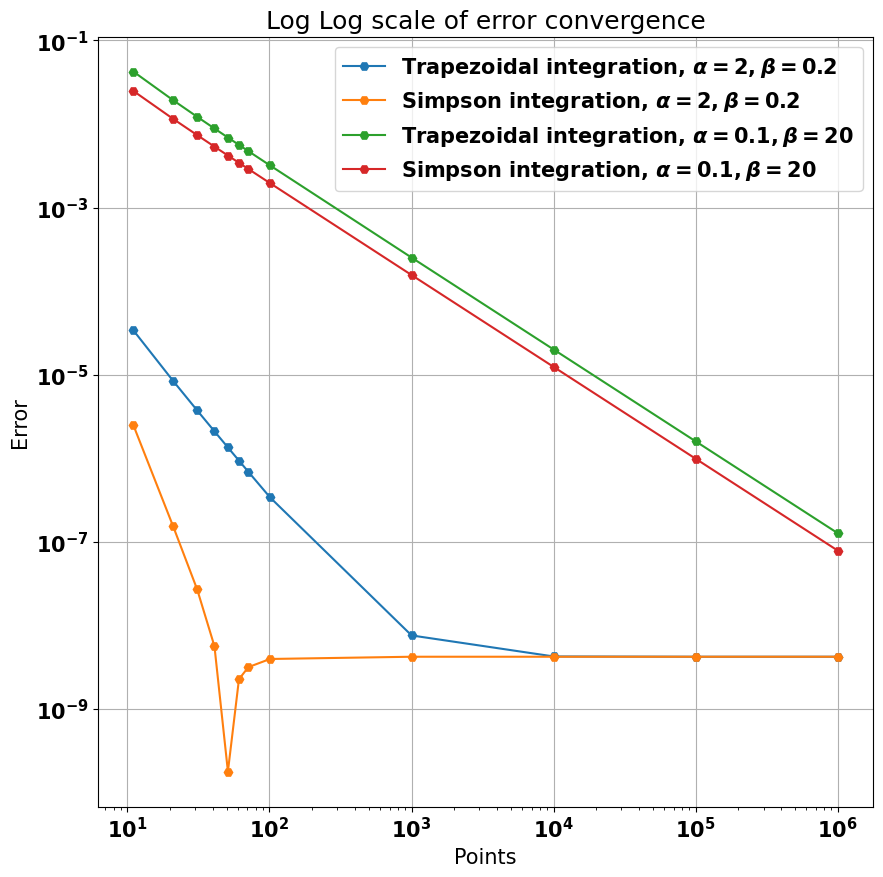

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Log Log scale of error convergence')
ax.loglog(numbers,error_t_a,marker = 'H',label = r'Trapezoidal integration, $\alpha = 2,\beta = 0.2$')
ax.loglog(numbers,error_s_a,marker = 'H',label = r'Simpson integration, $\alpha = 2,\beta = 0.2$')
ax.loglog(numbers,error_t_b,marker = 'H',label = r'Trapezoidal integration, $\alpha = 0.1,\beta = 20$')
ax.loglog(numbers,error_s_b,marker = 'H',label = r'Simpson integration, $\alpha = 0.1,\beta = 20$')
ax.legend()
ax.set_xlabel('Points')
ax.set_ylabel('Error')
ax.grid(True)
plt.savefig('loglogstandardintegraion',bbox_inches='tight')

In [62]:
res1 = stats.linregress(np.log10(numbers[1:7]),np.log10(error_t_a[1:7]))
res2 = stats.linregress(np.log10(numbers),np.log10(error_t_b))
res3 = stats.linregress(np.log10(numbers[1:3]),np.log10(error_s_a[1:3]))
res4 = stats.linregress(np.log10(numbers),np.log10(error_s_b))
print(f'Convergence of trapezoidal integration in case a is {res1.slope},\
       in case b is {res2.slope}, of simpson integration in case a is {res3.slope}, in case b is {res4.slope} ')

Convergence of trapezoidal integration in case a is -2.0550975023086067,       in case b is -1.108912199851417, of simpson integration in case a is -4.467988298304402, in case b is -1.1056678461058809 


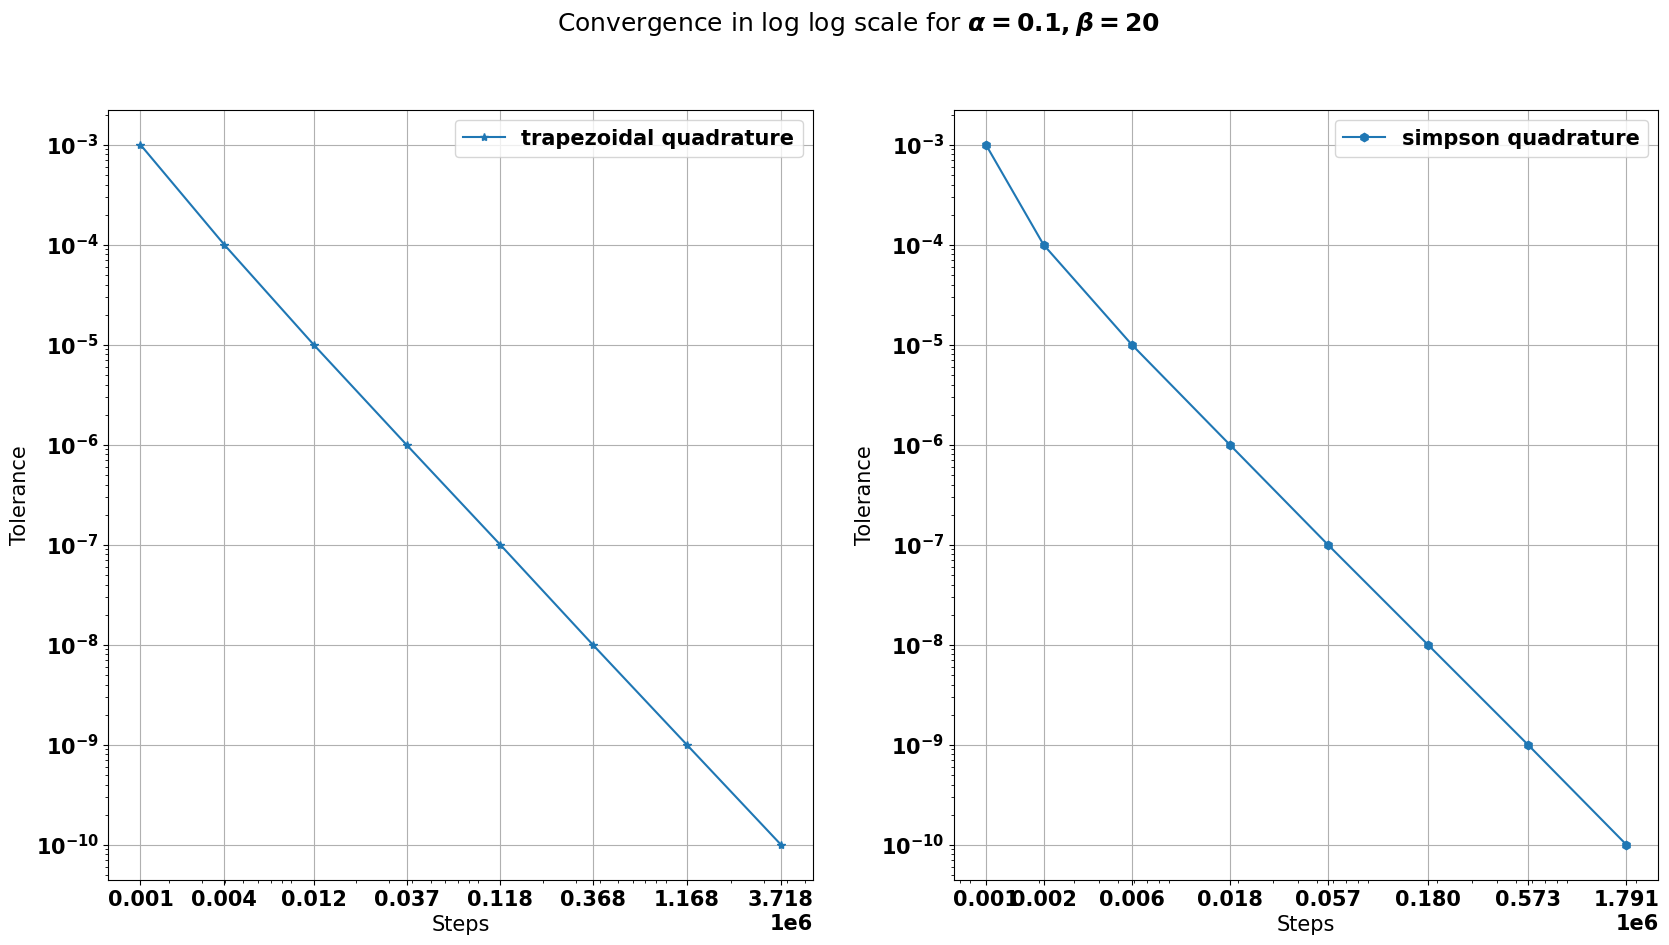

In [13]:
steps_trap1,steps_simp1 = evaluation_convergence(0.1,20)

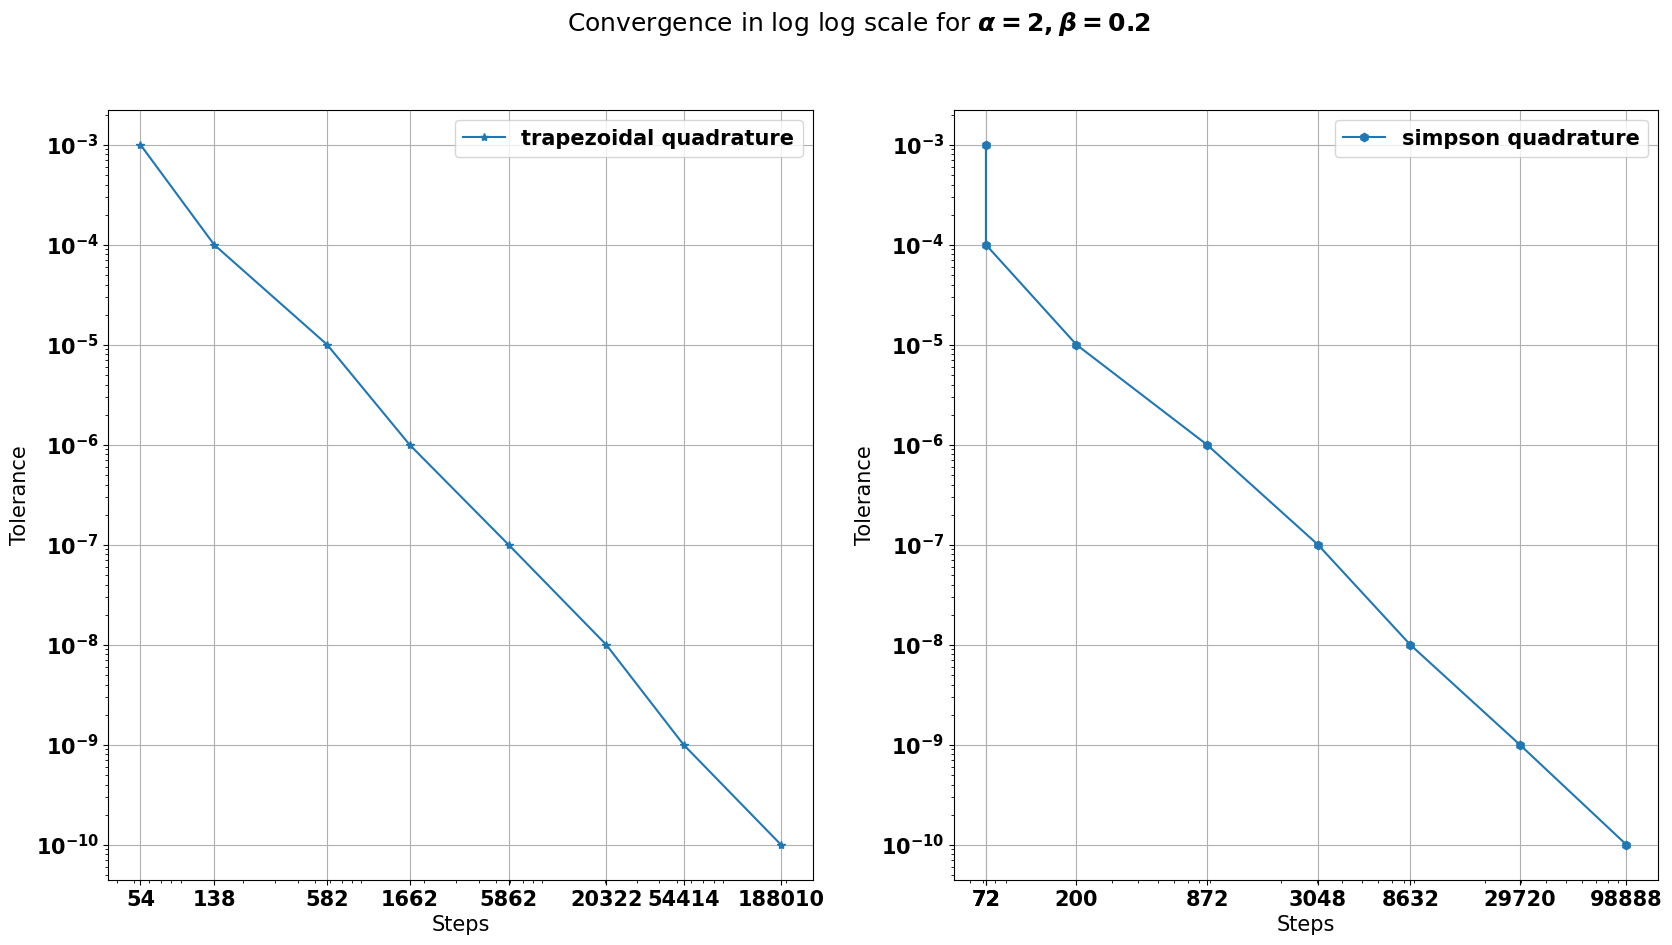

In [14]:
steps_trap2,steps_simp2 = evaluation_convergence(2,0.2)

In [17]:
res1 = stats.linregress(np.log10(steps_trap2[2:6]),np.log10(tolerances[2:6]))
res2 = stats.linregress(np.log10(steps_trap1[-3:]),np.log10(tolerances[-3:]))
res3 = stats.linregress(np.log10(steps_simp2[2:6]),np.log10(tolerances[2:6]))
res4 = stats.linregress(np.log10(steps_simp1[-3:]),np.log10(tolerances[-3:]))
print(f'Convergence of trapezoidal quadrature integration in case a is {res1.slope},\
       in case b is {res2.slope}, of simpson quadrature integration in case a is {res3.slope}, in case b is {res4.slope} ')

Convergence of trapezoidal quadrature integration in case a is -1.9285301681910358,       in case b is -1.9900695844594516, of simpson quadrature integration in case a is -1.824494671487773, in case b is -2.004438647337614 
